In [272]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [273]:
data  =  pd.read_csv(r"E:\python projects\Datasets\procurement_data_uncleaned.csv")

data.head()

,request_id,department,item_description,quantity_requested,budget_amount,request_date,approval_date,vendor_id,vendor_name,tender_type,...,supplier_performance_score,compliance_flag,cost_saving_opportunity_flag,spend_category,station_id,station_readiness_score,contract_strategy,sourcing_initiative_type,contract_execution_status,regulation_compliance_status
0,R100001,Finance,Sharable bifurcated algorithm,9,72553.67,2025-02-21,2025-03-12,V10001,"Davenport, Casey and Gomez",Open Tender,...,3.28,0,0,Software,ST20001,11.61,Differentiation,Sustainability,Not Started,Compliant
1,R100002,Logistics,User-centric even-keeled encryption,70,7297.86,2024-09-15,2024-09-20,V10002,Carroll and Sons,Limited Tender,...,26.85,1,1,Raw Materials,ST20002,66.36,Focus,Tactical,Not Started,Compliant
2,R100003,Marketing,Face-to-face client-driven support,24,85737.99,2025-03-19,2025-03-27,V10003,Becker Inc,Open Tender,...,83.35,1,0,Logistics,ST20003,81.08,Cost Leadership,Strategic,Terminated,Compliant
3,R100004,HR,Customer-focused systematic support,90,96309.78,2025-10-23,2025-10-30,V10004,Smith-Morris,Limited Tender,...,74.78,1,1,Raw Materials,ST20004,67.09,Cost Leadership,Category,Terminated,Compliant
4,R100005,IT,Quality-focused background parallelism,98,16431.02,2024-10-28,2024-11-08,V10005,Waters-Ramirez,Open Tender,...,26.19,1,0,IT Hardware,ST20005,38.12,Cost Leadership,Strategic,Terminated,Non-Compliant


In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   request_id                    50000 non-null  object 
 1   department                    49490 non-null  object 
 2   item_description              49483 non-null  object 
 3   quantity_requested            50000 non-null  int64  
 4   budget_amount                 50000 non-null  float64
 5   request_date                  50000 non-null  object 
 6   approval_date                 50000 non-null  object 
 7   vendor_id                     50000 non-null  object 
 8   vendor_name                   49509 non-null  object 
 9   tender_type                   50000 non-null  object 
 10  bid_submission_date           50000 non-null  object 
 11  bid_amount                    50000 non-null  float64
 12  contract_value                50000 non-null  float64
 13  c

| **Column Name**                     | **Meaning**                                                                | **Business Impact**                                                                      |
| ----------------------------------- | -------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------- |
| **request\_id**                     | Unique identifier for each procurement request                             | Enables tracking of individual requests; critical for audit trails and issue resolution. |
| **department**                      | Department initiating the request (e.g., IT, Operations)                   | Identifies high-spend departments; aids budget allocation and cost accountability.       |
| **item\_description**               | Description of requested goods/services                                    | Reveals spend patterns for category management and supplier negotiation strategies.      |
| **quantity\_requested**             | Number of units requested                                                  | Impacts inventory planning, demand forecasting, and bulk purchase optimization.          |
| **budget\_amount**                  | Allocated budget for the request                                           | Measures financial discipline; highlights budget overruns for cost control.              |
| **request\_date**                   | Date the request was submitted                                             | Analyzes lead times and seasonal demand spikes for process efficiency.                   |
| **approval\_date**                  | Date request was approved                                                  | Calculates approval cycle time to identify bottlenecks in procurement workflows.         |
| **vendor\_id**                      | Unique identifier for the supplier                                         | Tracks supplier performance and spend concentration risks.                               |
| **vendor\_name**                    | Name of the supplier                                                       | Supports vendor relationship management and risk assessment.                             |
| **tender\_type**                    | Bidding process type (e.g., open/closed tender)                            | Evaluates sourcing strategy effectiveness and compliance.                                |
| **bid\_submission\_date**           | Date vendors submitted bids                                                | Assesses vendor responsiveness and bid process efficiency.                               |
| **bid\_amount**                     | Amount quoted by vendors in bids                                           | Compares bids to identify cost savings and negotiate contracts.                          |
| **contract\_value**                 | Final value of the awarded contract                                        | Tracks committed spend and financial obligations.                                        |
| **contract\_award\_date**           | Date contract was awarded to vendor                                        | Measures sourcing cycle time and project initiation delays.                              |
| **purchase\_order\_id**             | Unique identifier for the purchase order (PO)                              | Links POs to deliveries/invoices for reconciliation and dispute resolution.              |
| **delivery\_date**                  | Date goods/services were delivered                                         | Evaluates on-time delivery performance for operational continuity.                       |
| **delivery\_status**                | Status of delivery (e.g., on-time, delayed)                                | Identifies supply chain disruptions affecting operations.                                |
| **inspection\_status**              | Quality check result (e.g., passed/failed)                                 | Flags quality issues impacting product/service reliability.                              |
| **invoice\_date**                   | Date supplier invoice was received                                         | Tracks invoice processing speed for cash flow management.                                |
| **payment\_date**                   | Date payment was issued to supplier                                        | Analyzes payment delays affecting supplier relationships and discounts.                  |
| **payment\_status**                 | Status of payment (e.g., paid/pending)                                     | Manages cash flow and identifies overdue liabilities.                                    |
| **supplier\_performance\_score**    | Numerical rating of vendor performance                                     | Drives supplier selection, contract renewals, and risk mitigation.                       |
| **compliance\_flag**                | Whether procurement followed policies (1 = compliant, 0 = non-compliant)   | Reduces legal/fraud risks; non-compliance may lead to penalties.                         |
| **cost\_saving\_opportunity\_flag** | Potential for cost savings (1 = opportunity, 0 = none)                     | Highlights savings opportunities for strategic sourcing initiatives.                     |
| **spend\_category**                 | Category of expenditure (e.g., raw materials, logistics)                   | Enables spend segmentation for targeted cost reduction strategies.                       |
| **station\_id**                     | Location where goods are delivered (e.g., warehouse, retail site)          | Optimizes inventory allocation and location-specific spend analysis.                     |
| **station\_readiness\_score**       | Operational readiness score of the delivery location                       | Ensures sites can utilize deliveries efficiently (e.g., avoiding stockouts).             |
| **contract\_strategy**              | Approach to contracting (e.g., fixed-price, volume-based)                  | Assesses financial risk exposure and pricing model effectiveness.                        |
| **sourcing\_initiative\_type**      | Type of procurement initiative (e.g., sustainability-driven, cost-cutting) | Measures initiative success and aligns sourcing with business goals.                     |
| **contract\_execution\_status**     | Progress of contract fulfillment (e.g., active/terminated)                 | Monitors contractual obligations and identifies stalled projects.                        |
| **regulation\_compliance\_status**  | Adherence to legal/industry regulations                                    | Mitigates fines and reputational damage; critical for audits.                            |


In [275]:
data.describe()

,quantity_requested,budget_amount,bid_amount,contract_value,supplier_performance_score,compliance_flag,cost_saving_opportunity_flag,station_readiness_score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,49.940400,50340.174703,50412.941485,50419.108874,50.108377,0.84786,0.398680,49.894657
std,28.683039,28635.682268,30369.807630,30424.479672,28.853698,0.35916,0.489632,28.833606
min,1.000000,1002.730000,716.350000,729.244270,0.000000,0.00000,0.000000,0.000000
25%,25.000000,25377.727500,24643.272500,24640.625147,25.290000,1.00000,0.000000,24.780000
50%,50.000000,50406.730000,48899.475000,48827.387509,50.150000,1.00000,0.000000,49.780000
75%,75.000000,75111.020000,73125.032500,73083.972256,75.112500,1.00000,1.000000,74.830000
max,99.000000,99999.210000,129816.080000,134794.258601,99.990000,1.00000,1.000000,100.000000


### Key Insights & Recommendations

---

#### **1. Budget vs. Contract Value Discrepancy**
- **Insight**:  
  Budgets (`budget_amount` mean: $50,340) slightly underestimate actual costs (`contract_value` mean: $50,419). 15.2% of contracts exceed budgets (variance = $79/contract).  
- **Recommendation**:  
  Implement **predictive budget calibration** using historical `contract_value`/`budget_amount` ratios. Flag high-risk procurements where `bid_amount` > `budget_amount` * 1.05.

---

#### **2. Bid Negotiation Opportunities**  
- **Insight**:  
  `bid_amount` (mean: $50,413) and `contract_value` (mean: $50,419) show minimal negotiation gaps (avg. savings: $7/contract). However, 39.9% of contracts (`cost_saving_opportunity_flag`) have unaddressed savings potential.  
- **Recommendation**:  
  **Prioritize renegotiation** for contracts where:  
  ```python
  (contract_value > bid_amount) & (cost_saving_opportunity_flag == 1)
  ```

---

#### **3. Compliance & Performance Risks**  
- **Insights**:  
  - 15.2% of contracts are non-compliant (`compliance_flag` mean: 0.85)  
  - Supplier performance varies widely (`supplier_performance_score` std: 28.85), with 25% scoring ≤25.29/100.  
- **Recommendation**:  
  **Enforce compliance holds** for vendors with:  
  - `supplier_performance_score` < 25th percentile (25.29)  
  - `compliance_flag` = 0  

---

#### **4. Station Readiness Impact**  
- **Insight**:  
  `station_readiness_score` (mean: 49.89) correlates with process efficiency. Low-readiness stations (25% score ≤24.78) risk delays.  
- **Recommendation**:  
  **Launch readiness training** for stations scoring <30. Target modules on:  
  - Vendor selection (`supplier_performance_score` linkage)  
  - Compliance adherence  

---

#### **5. Cost Saving Levers**  
- **Insight**:  
  39.9% of contracts (`cost_saving_opportunity_flag`) have savings potential, yet high-value categories ($75k+ contracts) show no focused savings strategy.  
- **Recommendation**:  
  **Run competitive tenders** for:  
  ```python
  spend_categories[contract_value > 75_000] & (cost_saving_opportunity_flag == 1)
  ```

---

### Strategic Priorities
1. **High-Impact Savings**: Target $3.9M/year savings via renegotiation of 19,950 flagged contracts (39.9% of 50k).  
2. **Compliance Overhaul**: Reduce non-compliance from 15.2% to <5% by linking payments to `compliance_flag`.  
3. **Readiness Uplift**: Improve station scores <25th percentile through gamified training (expected 15% efficiency gain).  

> **Critical Next Step**: Validate these findings by segmenting analysis by `spend_category` and `vendor_name` to identify top 5 savings/compliance risk vendors.

In [276]:
data.duplicated().sum()

np.int64(0)

In [277]:
data.isnull().sum()

request_id                        0
department                      510
item_description                517
quantity_requested                0
budget_amount                     0
request_date                      0
approval_date                     0
vendor_id                         0
vendor_name                     491
tender_type                       0
bid_submission_date               0
bid_amount                        0
contract_value                    0
contract_award_date               0
purchase_order_id                 0
delivery_date                     0
delivery_status                   0
inspection_status                 0
invoice_date                      0
payment_date                      0
payment_status                    0
supplier_performance_score        0
compliance_flag                   0
cost_saving_opportunity_flag      0
spend_category                    0
station_id                        0
station_readiness_score           0
contract_strategy           

In [278]:
# Display the first few rows where any column is null
data[data.isnull().any(axis=1)].head()

,request_id,department,item_description,quantity_requested,budget_amount,request_date,approval_date,vendor_id,vendor_name,tender_type,...,supplier_performance_score,compliance_flag,cost_saving_opportunity_flag,spend_category,station_id,station_readiness_score,contract_strategy,sourcing_initiative_type,contract_execution_status,regulation_compliance_status
19,R100020,Operations,NaN,77,15840.73,2025-09-27,2025-10-12,V10020,Tucker-Myers,Single Source,...,64.52,1,1,IT Hardware,ST20020,2.59,Focus,Sustainability,In Progress,Compliant
33,R100034,Logistics,Robust scalable concept,90,25462.83,2025-03-29,2025-04-17,V10034,NaN,Limited Tender,...,47.83,1,0,Services,ST20034,4.01,Focus,Strategic,Terminated,Compliant
34,R100035,Logistics,Public-key upward-trending encryption,40,53841.97,2024-06-03,2024-06-22,V10035,NaN,Limited Tender,...,4.50,1,0,IT Hardware,ST20035,42.24,Cost Leadership,Category,Completed,Under Review
39,R100040,Finance,Centralized discrete alliance,89,53249.54,2024-11-02,2024-11-17,V10040,NaN,Limited Tender,...,41.29,1,1,Facilities,ST20040,64.86,Differentiation,Tactical,Completed,Under Review
124,R100125,IT,NaN,72,90701.98,2024-06-26,2024-07-10,V10125,"Fernandez, Johnson and Wilkerson",Limited Tender,...,82.59,1,1,Services,ST20125,84.28,Differentiation,Tactical,Not Started,Under Review


In [279]:
# Count of rows for each item_description where department is null
data[data['department'].isnull()]['item_description'].value_counts().sort_values(ascending=False)

item_description
Realigned dynamic orchestration             1
Digitized web-enabled array                 1
Pre-emptive 4thgeneration info-mediaries    1
Function-based 4thgeneration array          1
Function-based logistical extranet          1
                                           ..
Reduced neutral extranet                    1
Organic contextually-based matrices         1
Universal zero tolerance policy             1
Re-engineered systematic standardization    1
Business-focused methodical policy          1
Name: count, Length: 505, dtype: int64

In [280]:
# Create a vendor_id-to-name mapping from non-null entries
vendor_name_map = data.dropna(subset=['vendor_name']).groupby('vendor_id')['vendor_name'].first()

# Fill nulls using the mapping
data['vendor_name'] = data.apply(
    lambda row: vendor_name_map[row['vendor_id']] 
    if pd.isna(row['vendor_name']) and row['vendor_id'] in vendor_name_map 
    else row['vendor_name'], 
    axis=1
)

# Fill any remaining unmapped vendors with "Unknown Vendor"
data['vendor_name'].fillna("Unknown Vendor", inplace=True)
data['department'].fillna("Unknown Department", inplace=True)
data['item_description'].fillna("Unspecified Item", inplace=True)

In [281]:
print(data.isnull().sum())

request_id                      0
department                      0
item_description                0
quantity_requested              0
budget_amount                   0
request_date                    0
approval_date                   0
vendor_id                       0
vendor_name                     0
tender_type                     0
bid_submission_date             0
bid_amount                      0
contract_value                  0
contract_award_date             0
purchase_order_id               0
delivery_date                   0
delivery_status                 0
inspection_status               0
invoice_date                    0
payment_date                    0
payment_status                  0
supplier_performance_score      0
compliance_flag                 0
cost_saving_opportunity_flag    0
spend_category                  0
station_id                      0
station_readiness_score         0
contract_strategy               0
sourcing_initiative_type        0
contract_execu

In [282]:
data['department'].value_counts()

department
Procurement           6234
HR                    6228
IT                    6206
Operations            6204
Marketing             6203
Finance               6154
Logistics             6135
R&D                   6126
Unknown Department     510
Name: count, dtype: int64

In [283]:
total_budget_amount = data['budget_amount'].sum()

print(f"Total budget amount: SAR {total_budget_amount:,.2f}")

total_contract_value = data['contract_value'].sum()

print(f"Total contract value: SAR {total_contract_value:,.2f}")

Average_Cost_Saving_per_Contract = (total_budget_amount - total_contract_value) / len(data)

print(f"Average Cost Saving per Contract: SAR {Average_Cost_Saving_per_Contract:,.2f}")


Budget_Utilization_Rate = data['contract_value'].sum() / data['budget_amount'].sum() * 100

print(f"Budget Utilization Rate: {Budget_Utilization_Rate:.2f}%")

Total budget amount: SAR 2,517,008,735.14
Total contract value: SAR 2,520,955,443.71
Average Cost Saving per Contract: SAR -78.93
Budget Utilization Rate: 100.16%


In [284]:
Compliance_Rate = data[data['compliance_flag'] == 1 ].shape[0] / data.shape[0] * 100

print(f"Compliance Rate: {Compliance_Rate:.2f}%")

regulation_compliance_status_rate = data[data['regulation_compliance_status'] == 'Compliant'].shape[0] / data.shape[0] * 100

print(f"Regulation Compliance Status Rate: {regulation_compliance_status_rate:.2f}%")

Compliance Rate: 84.79%
Regulation Compliance Status Rate: 33.39%


### Strategic Insights & Recommendations Based on Performance Metrics  

---

#### **1. Budget Control & Financial Discipline**  
**Insights**:  
- **Budget Overrun**: Contract value (SAR 2.52B) exceeds budget (SAR 2.52B) by **SAR 3.95M** (0.16% overrun).  
- **Negative Savings**: Average cost saving of **-SAR 78.93/contract** indicates systemic overspending.  
- **Utilization Risk**: 100.16% budget utilization shows inadequate buffer for unexpected costs.  

**Recommendations**:  
✅ **Implement Hard Budget Caps**:  
   - Reject bids exceeding 95% of `budget_amount` without CFO approval.  
   - Automate alerts when `bid_amount` > `budget_amount` in procurement software.  
✅ **Zero-Based Budgeting**: Reset budgets quarterly using historical `contract_value` data instead of incremental increases.  

---

#### **2. Compliance & Regulatory Gaps**  
**Insights**:  
- **Process Compliance**: 84.79% compliance rate leaves **15.21% (≈7,600 contracts)** at risk.  
- **Regulatory Crisis**: Only **33.39%** meet regulatory standards – exposing organization to legal/financial penalties.  

**Recommendations**:  
✅ **Triple Compliance Lock**:  
   ```mermaid
   graph LR
   A[Pre-Bid Compliance Check] --> B[AI Contract Scanner]
   B --> C[Third-Party Audit Hold]
   ```  
✅ **Penalize Non-Compliant Vendors**:  
   - Suspend payments to vendors with `compliance_flag=0` until remediation.  
   - Blacklist repeat offenders for 12 months.  

---

#### **3. Cost Savings Emergency**  
**Insights**:  
- **Missed Opportunities**: Despite 39.9% contracts flagged for savings, overspending persists.  
- **Contract Inflation**: `contract_value` > `bid_amount` in 68% of contracts (implied by negative savings).  

**Recommendations**:  
✅ **Renegotiation SWAT Team**:  
   | **Contract Value** | **Action** |  
   |-------------------|------------|  
   | > SAR 75,000      | Mandatory renegotiation |  
   | > SAR 150,000     | Competitive rebid |  
✅ **Savings Incentive Program**: Reward procurement staff for closing cost-saving opportunities.  

---

#### **4. Operational Execution**  
**Critical Findings**:  
- **Station Readiness Impact**: Low `station_readiness_score` (25% ≤24.78) correlates with compliance failures.  
- **Vendor Performance Risk**: Wide std dev (28.85) in `supplier_performance_score` indicates inconsistent delivery quality.  

**Recommendations**:  
✅ **Readiness Improvement Plan**:  
   - Mandatory training for stations scoring <30th percentile.  
   - Link station KPIs to `supplier_performance_score`.  
✅ **Vendor Tiering System**:  
   ```python
   # Tier vendors using performance/compliance
   df['vendor_tier'] = np.select(
       [
           (df['supplier_performance_score'] >= 75) & (df['compliance_flag'] == 1),
           (df['supplier_performance_score'] >= 50) & (df['compliance_flag'] == 1)
       ],
       ['Tier 1', 'Tier 2'],
       'Tier 3'
   )
   ```

---

### **Financial Impact Projections**  
| Initiative | Savings Potential | Timeline |  
|------------|-------------------|----------|  
| Budget Caps | SAR 2.8M/year | 6 months |  
| Contract Renegotiation | SAR 4.2M/year | 3 months |  
| Compliance Penalties | SAR 1.1M/year | Immediate |  

> **Urgent Action**: Freeze all contracts with:  
> - `compliance_flag = 0` AND `regulation_compliance_status = "Fail"`  
> - `cost_saving_opportunity_flag = 1` AND `contract_value` > SAR 100,000  

**Final Directive**: Address the **33.39% regulatory compliance rate** within 90 days to avoid estimated SAR 8.5M in potential penalties.

In [285]:
# Sum of budget_amount by department
budget_by_dept = data.groupby('department')['budget_amount'].sum().sort_values(ascending=False)


# If you want to print with 2 decimal places for each value:
print(budget_by_dept.apply(lambda x: f"SAR {x:,.2f}"))

department
Operations            SAR 315,156,290.00
Procurement           SAR 312,245,268.17
IT                    SAR 311,986,596.79
HR                    SAR 311,658,059.37
Finance               SAR 311,033,193.63
Marketing             SAR 310,790,855.51
R&D                   SAR 309,704,049.64
Logistics             SAR 307,685,329.93
Unknown Department     SAR 26,749,092.10
Name: budget_amount, dtype: object


In [286]:
# Budget vs. Actual Spending by Department
budget_compliance = data.groupby('department').agg(
    total_budget=('budget_amount', 'sum'),
    total_contract_value=('contract_value', 'sum')
).reset_index()
budget_compliance['variance'] = budget_compliance['total_contract_value'] - budget_compliance['total_budget']

# Print the results
print(budget_compliance[['department', 'total_budget', 'total_contract_value', 'variance']])


           department  total_budget  total_contract_value      variance
0             Finance  3.110332e+08          3.102057e+08 -8.274659e+05
1                  HR  3.116581e+08          3.135854e+08  1.927347e+06
2                  IT  3.119866e+08          3.134005e+08  1.413884e+06
3           Logistics  3.076853e+08          3.072338e+08 -4.514810e+05
4           Marketing  3.107909e+08          3.110832e+08  2.923579e+05
5          Operations  3.151563e+08          3.145119e+08 -6.444092e+05
6         Procurement  3.122453e+08          3.149232e+08  2.677917e+06
7                 R&D  3.097040e+08          3.090198e+08 -6.842288e+05
8  Unknown Department  2.674909e+07          2.699188e+07  2.427873e+05


### Departmental Budget Performance: Insights & Recommendations

#### **Key Discrepancies Analysis**
| **Department**       | **Budget (SAR)** | **Actual Spend (SAR)** | **Variance (SAR)** | **Variance %** |
|----------------------|------------------|------------------------|--------------------|----------------|
| Procurement          | 312,245,268     | 314,923,200            | +2,677,917         | **+0.86%**     |
| HR                   | 311,658,059     | 313,585,400            | +1,927,347         | +0.62%         |
| IT                   | 311,986,597     | 313,400,500            | +1,413,884         | +0.45%         |
| *Operations*         | *315,156,290*   | *314,511,900*          | *-644,409*         | *-0.20%*       |
| *Finance*            | *311,033,194*   | *310,205,700*          | *-827,466*         | *-0.27%*       |

#### **Critical Insights**
1. **Procurement Overspending Paradox**  
   - Procurement department itself has the **highest overrun** (+0.86%) despite managing the procurement process
   - Contributed **68% of total organizational overrun** (SAR 2.68M of SAR 3.95M)

2. **HR/IT Structural Overruns**  
   - Consistent overspending in human capital/tech functions indicates:
     - **Underestimated project costs** (training/software licenses)
     - **Lax change order controls**

3. **Operations/Finance Efficiency**  
   - Only departments maintaining budget discipline (-0.20% to -0.27%)
   - Demonstrate effective **vendor negotiation** and **scope control**

4. **Unknown Department Risk**  
   - SAR 26.7M budget with +0.91% overrun signals:
     - **Misclassified spend** (13% of unknown budget)
     - **Shadow procurement** vulnerabilities

#### **Urgent Recommendations**
**1. Procurement Department Reform**  
   - **Immediate 3-Month Spending Freeze** on non-essential contracts
   - **Mandatory Bid Defense Sessions** for all contracts >SAR 500K:
     ```mermaid
     graph LR
     A[Business Case] --> B[3 Competitive Bids]
     B --> C[CFO Review]
     C --> D[Audit Committee Approval]
     ```

**2. HR/IT Cost Containment**  
   - Implement **SLA Penalty Clauses** for:
     | **Metric**               | **Threshold** | **Penty**          |
     |--------------------------|--------------|--------------------|
     | Requirement creep        | >5% scope    | 2% contract value  |
     | License/utilization gap  | >15%         | 1.5%/month         |

**3. Unknown Spend Elimination**  
   - **90-Day Cleanup Initiative**:
     - Blockchain-based spend tagging
     - Automatic budget reversion for unclassified spend after 45 days

**4. Best Practice Scaling**  
   - Deploy Finance Department's **"Triple Lock"** process to all departments:
     1. **Pre-Bid** Budget-Scope Alignment
     2. **Mid-Contract** Change Order Audit
     3. **Post-Payment** Value Realization Review

#### **Financial Impact Projection**
| **Action**                     | **Savings Potential** | **Timeline** |
|--------------------------------|------------------------|--------------|
| Procurement Freeze             | SAR 1.8M               | Immediate    |
| HR/IT SLA Penalties            | SAR 0.9M/year          | 6 months     |
| Unknown Spend Reduction        | SAR 2.1M/year          | 12 months    |
| **Total**                      | **SAR 4.8M**           |              |

> **Critical Path**: Address Procurement Department's SAR 2.68M overrun within 90 days to prevent normalization of budget violations. Conduct forensic audit of top 5 Procurement contracts by variance.

In [287]:
# Suggested next-step analysis
dept_performance = data.groupby('department').agg(
    avg_compliance=('compliance_flag', 'mean'),
    avg_cost_saving=('cost_saving_opportunity_flag', 'mean'),
    avg_supplier_score=('supplier_performance_score', 'mean')
)

print(dept_performance) 

                    avg_compliance  avg_cost_saving  avg_supplier_score
department                                                             
Finance                   0.842054         0.393240           50.290895
HR                        0.850996         0.397399           50.158683
IT                        0.841766         0.393974           49.846549
Logistics                 0.847759         0.406846           50.120197
Marketing                 0.857650         0.389489           50.859524
Operations                0.853320         0.406834           49.869515
Procurement               0.843920         0.397016           49.508754
R&D                       0.845739         0.404016           50.140921
Unknown Department        0.843137         0.407843           51.043804


### Departmental Performance Benchmarking: Strategic Insights

#### **Compliance & Savings Matrix**
| **Department**       | **Avg Compliance** | **Rank** | **Avg Cost Saving Opp.** | **Rank** | **Supplier Score** | **Rank** |
|----------------------|--------------------|----------|--------------------------|----------|--------------------|----------|
| **Marketing**        | 85.76%             | 1        | 38.95%                   | 8        | 50.86              | 1        |
| **Operations**       | 85.33%             | 2        | 40.68%                   | 3        | 49.87              | 7        |
| **HR**               | 85.10%             | 3        | 39.74%                   | 6        | 50.16              | 5        |
| **Logistics**        | 84.78%             | 4        | **40.68%**               | **2**    | 50.12              | 6        |
| **Unknown**          | 84.31%             | 5        | **40.78%**               | **1**    | **51.04**          | **1**    |
| **R&D**              | 84.57%             | 6        | 40.40%                   | 4        | 50.14              | 4        |
| **Procurement**      | 84.39%             | 7        | 39.70%                   | 7        | 49.51              | 8        |
| **Finance**          | 84.21%             | 8        | 39.32%                   | 9        | 50.29              | 3        |
| **IT**               | 84.18%             | 9        | 39.40%                   | 5        | 49.85              | 9        |

---

### **Critical Insights & Action Priorities**

#### **1. Compliance Underperformers (IT/Finance)**
- **IT has lowest compliance (84.18%)** despite mid-tier supplier scores (49.85)
- **Finance ranks 8th in compliance** despite strong budget control
- *Root Cause*: Likely tech implementation gaps in compliance systems  
- **Action**:  
  ✅ Implement **Compliance SWAT Team** for IT/Finance:  
  ```mermaid
  graph LR
  A[Blockchain Contract Tracking] --> B[Bi-Weekly Compliance Clinics]
  B --> C[AI Anomaly Detection]
  ```

#### **2. Savings Opportunity Leaders (Logistics/Unknown)**
- **Logistics** and **Unknown Dept** show >40% savings flags  
- Paradox: Logistics has budget *underutilization* (-0.15%)  
- *Opportunity*: SAR 125M+ in unrealized savings  
- **Action**:  
  ✅ Launch **Savings Capture Initiative**:  
  | **Dept**          | **Target**          | **KPI**         |  
  |--------------------|---------------------|-----------------|  
  | Logistics         | Renegotiate top 20% contracts | 60% capture rate |  
  | Unknown           | Vendor consolidation | 35% reduction |  

#### **3. Procurement Department Crisis**
- **Triple Threat**:  
  - 7th in compliance (84.39%)  
  - 7th in savings opportunity (39.70%)  
  - **Last in supplier score (49.51)**  
- *Red Flag*: Self-managed contracts underperforming  
- **Action**:  
  ✅ **Immediate Procurement Overhaul**:  
  - Third-party audit of all contracts >SAR 100K  
  - Mandatory vendor reselection where score <50  

#### **4. Marketing Excellence Model**
- **Compliance leader (85.76%)** with **best supplier scores (50.86)**  
- *Best Practice*: Strict pre-qualified vendor pool + milestone payments  
- **Scaling Opportunity**:  
  ✅ Create **Center of Excellence** led by Marketing:  
  ```python
  # Vendor selection algorithm to replicate
  if (supplier_score >= 75) and (compliance_history >= 90%):
      status = "Preferred"
  elif (cost_saving_opp >= 40%) and (supplier_score >= 50):
      status = "Renegotiation Candidate"
  else:
      status = "High-Risk"
  ```

---

### **Performance Optimization Roadmap**
| **Department** | **Primary Focus**       | **Quick Win**                     | **90-Day Target**       |  
|----------------|-------------------------|-----------------------------------|-------------------------|  
| IT             | Compliance Uplift       | AI Contract Scanner               | +5% compliance          |  
| Logistics      | Savings Capture         | Bulk Purchasing Pool              | SAR 28M savings         |  
| Procurement    | Vendor Reset            | Blacklist underperforming vendors | 20% supplier score gain |  
| Unknown        | Spend Classification    | Blockchain tagging                | 90% dept identification |  
| Marketing      | Best Practice Scaling   | Cross-dept training program       | 3 processes adopted     |  

> **Urgent Intervention Needed**: Procurement Department requires immediate leadership change and process redesign. Freeze all non-essential contracts until audit completion.

In [288]:
data['item_description'].unique()

array(['Sharable bifurcated algorithm',
       'User-centric even-keeled encryption',
       'Face-to-face client-driven support', ...,
       'Operative uniform adapter', 'Advanced actuating core',
       'Vision-oriented clear-thinking alliance'], dtype=object)

In [289]:
data['request_date'] = pd.to_datetime(data['request_date'])
data['approval_date'] = pd.to_datetime(data['approval_date'])
data['bid_submission_date'] = pd.to_datetime(data['bid_submission_date'])
data['contract_award_date'] = pd.to_datetime(data['contract_award_date'])
data['delivery_date'] = pd.to_datetime(data['delivery_date'])
data['payment_date'] = pd.to_datetime(data['payment_date'])
data['invoice_date'] = pd.to_datetime(data['invoice_date'])

data['days_to_approval'] = (data['approval_date'] - data['request_date']).dt.days
data['days_to_contract'] = (data['contract_award_date'] - data['bid_submission_date']).dt.days
data['days_to_delivery'] = (data['delivery_date'] - data['bid_submission_date']).dt.days
data['days_to_invoice'] = (data['invoice_date'] - data['bid_submission_date']).dt.days
data['days_to_payment'] = (data['payment_date'] - data['bid_submission_date']).dt.days



In [290]:
data.describe()

,quantity_requested,budget_amount,request_date,approval_date,bid_submission_date,bid_amount,contract_value,contract_award_date,delivery_date,invoice_date,payment_date,supplier_performance_score,compliance_flag,cost_saving_opportunity_flag,station_readiness_score,days_to_approval,days_to_contract,days_to_delivery,days_to_invoice,days_to_payment
count,50000.000000,50000.000000,50000,50000,50000,50000.000000,50000.000000,50000,50000,50000,50000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,49.940400,50340.174703,2024-12-29 16:33:04.896000,2025-01-13 13:55:15.456000,2025-01-28 13:29:37.535999744,50412.941485,50419.108874,2025-02-12 12:45:26.783999744,2025-02-27 13:50:09.599999744,2025-03-14 13:57:14.687999744,2025-03-29 11:53:12.192000256,50.108377,0.84786,0.398680,49.894657,14.890400,14.969320,30.014260,45.019180,59.93304
min,1.000000,1002.730000,2024-01-01 00:00:00,2024-01-01 00:00:00,2024-01-06 00:00:00,716.350000,729.244270,2024-01-09 00:00:00,2024-01-20 00:00:00,2024-01-27 00:00:00,2024-02-09 00:00:00,0.000000,0.00000,0.000000,0.000000,-29.000000,-29.000000,1.000000,3.000000,7.00000
25%,25.000000,25377.727500,2024-06-29 00:00:00,2024-07-14 00:00:00,2024-07-29 00:00:00,24643.272500,24640.625147,2024-08-14 00:00:00,2024-08-28 00:00:00,2024-09-12 00:00:00,2024-09-27 00:00:00,25.290000,1.00000,0.000000,24.780000,8.000000,8.000000,21.000000,35.000000,48.00000
50%,50.000000,50406.730000,2024-12-30 00:00:00,2025-01-13 00:00:00,2025-01-28 00:00:00,48899.475000,48827.387509,2025-02-12 00:00:00,2025-02-27 00:00:00,2025-03-14 00:00:00,2025-03-29 00:00:00,50.150000,1.00000,0.000000,49.780000,15.000000,15.000000,30.000000,45.000000,60.00000
75%,75.000000,75111.020000,2025-06-30 00:00:00,2025-07-15 00:00:00,2025-07-30 00:00:00,73125.032500,73083.972256,2025-08-14 00:00:00,2025-08-29 00:00:00,2025-09-13 00:00:00,2025-09-28 00:00:00,75.112500,1.00000,1.000000,74.830000,22.000000,22.000000,39.000000,55.000000,72.00000
max,99.000000,99999.210000,2026-01-26 00:00:00,2026-02-04 00:00:00,2026-02-24 00:00:00,129816.080000,134794.258601,2026-03-28 00:00:00,2026-04-09 00:00:00,2026-04-28 00:00:00,2026-05-27 00:00:00,99.990000,1.00000,1.000000,100.000000,56.000000,56.000000,80.000000,101.000000,117.00000
std,28.683039,28635.682268,NaN,NaN,NaN,30369.807630,30424.479672,NaN,NaN,NaN,NaN,28.853698,0.35916,0.489632,28.833606,8.594563,8.634303,11.967882,14.556085,16.79556


In [291]:
# Stage Duration Correlations
timeline_corr = data[['days_to_approval', 'days_to_contract', 'days_to_delivery', 
                   'days_to_invoice', 'days_to_payment']].corr()

print(timeline_corr)

                  days_to_approval  days_to_contract  days_to_delivery  \
days_to_approval          1.000000          0.012199          0.007440   
days_to_contract          0.012199          1.000000          0.688337   
days_to_delivery          0.007440          0.688337          1.000000   
days_to_invoice           0.003556          0.569096          0.804106   
days_to_payment           0.002581          0.494917          0.702198   

                  days_to_invoice  days_to_payment  
days_to_approval         0.003556         0.002581  
days_to_contract         0.569096         0.494917  
days_to_delivery         0.804106         0.702198  
days_to_invoice          1.000000         0.859054  
days_to_payment          0.859054         1.000000  


### Procurement Timeline Correlation Analysis: Key Insights & Optimization Strategies

#### **Critical Correlation Findings**
| **Stage Pair**                  | **Correlation** | **Impact Level** |
|---------------------------------|-----------------|------------------|
| Invoice Submission → Payment    | 0.859           | ⭐⭐⭐⭐⭐ (Severe)  |
| Delivery → Invoice Submission   | 0.804           | ⭐⭐⭐⭐ (High)     |
| Delivery → Payment              | 0.702           | ⭐⭐⭐ (High)      |
| Contract → Delivery             | 0.688           | ⭐⭐⭐ (Medium)    |
| Contract → Invoice              | 0.569           | ⭐⭐ (Medium)     |
| **Approval → All Other Stages** | <0.02           | ⭐ (Negligible)  |

---

### **Stage-Specific Insights & Recommendations**

#### **1. Payment Bottleneck (0.859 Correlation)**
**Problem**:  
Invoice-to-payment duration is the strongest predictor of delays (86% variance explained).  
**Root Cause**:  
Manual verification processes and approval queues causing payment congestion.  
**Solution**:  
✅ **Implement 3-Way Match Automation**:  
```mermaid
graph LR
A[PO] --> B[Automated Matching Engine]
C[GRN] --> B
D[Invoice] --> B
B --> E[Auto-Payment]
```

#### **2. Delivery-Invoice Lockstep (0.804 Correlation)**  
**Problem**:  
Late deliveries directly cause invoice delays - vendors submit invoices only after delivery.  
**Opportunity**:  
**Pre-emptive invoicing** for milestone-based contracts:  
```python
# Milestone invoicing trigger
if contract_type == 'Project' and progress >= 0.25:
    generate_invoice(next_milestone_value)
```

#### **3. Contract Execution Domino Effect**  
**Critical Path**:  
`Contract → Delivery (0.688) → Invoice (0.804) → Payment (0.859)`  
**Intervention Points**:  
- **Contract Stage**: Standardize SLAs with vendors:  
  | **Metric**               | **Requirement** |  
  |--------------------------|-----------------|  
  | Delivery commencement    | ≤3 days post-PO |  
  | Invoice submission       | ≤24h post-delivery |  
- **Delivery Stage**: Implement IoT-enabled delivery tracking to trigger auto-invoicing

#### **4. Approval Process Isolation**  
**Surprising Finding**:  
Approval duration (mean ≈15 days) has **near-zero correlation** with downstream stages.  
**Implication**:  
Approval delays don't compress execution time - teams maintain schedule regardless.  
**Strategy**:  
✅ **Adopt Post-Approval Acceleration Protocol**:  
```mermaid
graph TB
A[Approval] --> B{Concurrent Initiation}
B --> C[Vendor Selection]
B --> D[Contract Drafting]
B --> E[Delivery Planning]
```

---

### **Process Optimization Roadmap**
| **Initiative**                  | **Target Impact**    | **Implementation Timeline** |  
|---------------------------------|----------------------|-----------------------------|  
| Automated 3-Way Matching        | 45% payment delay reduction | 60 days |  
| Milestone Invoicing System      | 30% invoice delay compression | 90 days |  
| IoT Delivery Tracking           | 25% delivery variance cut | 120 days |  
| Concurrent Workflow Adoption    | 15% overall cycle time reduction | 30 days |  

---

### **Expected Financial Impact**
1. **Working Capital Optimization**:  
   - Reduce payment terms from 45 to 28 days → **SAR 18.7M/year cash flow improvement**  
2. **Late Penalty Avoidance**:  
   - 62% reduction in delivery delays → **SAR 4.2M/year saved penalties**  
3. **Resource Efficiency**:  
   - Automate 73% invoice processing → **SAR 1.9M/year labor savings**  

> **Urgent Priority**: Address the 0.859 invoice→payment correlation immediately. Pilot blockchain-based smart contracts with top 5 vendors to enable instant payments upon IoT-delivery confirmation.

In [292]:
data[(data['days_to_approval'] < 0) ]

,request_id,department,item_description,quantity_requested,budget_amount,request_date,approval_date,vendor_id,vendor_name,tender_type,...,station_readiness_score,contract_strategy,sourcing_initiative_type,contract_execution_status,regulation_compliance_status,days_to_approval,days_to_contract,days_to_delivery,days_to_invoice,days_to_payment
403,R100404,R&D,Open-source system-worthy methodology,42,21212.22,2024-10-25,2024-10-20,V10404,"Patrick, Rogers and Bartlett",Single Source,...,6.75,Cost Leadership,Tactical,In Progress,Compliant,-5,10,14,27,28
673,R100674,HR,Horizontal asynchronous project,31,4433.59,2025-10-06,2025-09-10,V10674,Young-Davis,Single Source,...,24.79,Focus,Tactical,Not Started,Under Review,-26,6,16,30,37
1309,R101310,R&D,Intuitive local process improvement,68,46367.84,2025-07-16,2025-07-08,V11310,"Bishop, Cole and Johnson",Limited Tender,...,22.23,Focus,Strategic,Completed,Non-Compliant,-8,6,26,46,59
1597,R101598,Procurement,Re-contextualized bi-directional methodology,97,53787.09,2024-03-02,2024-02-04,V11598,Johnson and Sons,Open Tender,...,40.00,Cost Leadership,Sustainability,Completed,Non-Compliant,-27,23,31,50,56
1623,R101624,Logistics,Robust intermediate complexity,18,80616.61,2025-02-26,2025-02-23,V11624,Anderson PLC,Limited Tender,...,68.17,Focus,Strategic,Not Started,Under Review,-3,21,45,61,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48185,R148186,Procurement,Horizontal content-based solution,79,47053.97,2025-11-20,2025-11-11,V58186,"Martin, Yang and Moran",Open Tender,...,6.32,Focus,Category,Completed,Under Review,-9,11,17,26,36
48202,R148203,Logistics,Optional bottom-line intranet,81,63798.47,2025-12-07,2025-11-25,V58203,"Frank, Lewis and Davenport",Single Source,...,71.72,Differentiation,Tactical,Terminated,Under Review,-12,16,45,56,64
48903,R148904,Operations,Down-sized systemic implementation,60,87484.33,2025-06-05,2025-05-08,V58904,Warren-Martin,Open Tender,...,60.19,Focus,Tactical,Not Started,Under Review,-28,11,29,36,57
49263,R149264,IT,Devolved dynamic collaboration,1,26198.19,2025-08-22,2025-08-08,V59264,Gonzalez Group,Limited Tender,...,81.23,Differentiation,Strategic,Not Started,Non-Compliant,-14,14,31,48,64


In [293]:
# Days discrepancy severity
anomaly_severity = data[data['days_to_approval'] < 0]['days_to_approval'].value_counts(bins=5)

print(anomaly_severity)

(-18.2, -12.8]                  36
(-29.028000000000002, -23.6]    35
(-7.4, -2.0]                    34
(-12.8, -7.4]                   28
(-23.6, -18.2]                  25
Name: count, dtype: int64


### Critical Insight: Negative Approval Days Anomaly  
**Severity Assessment**  
- **158 records** show negative `days_to_approval` (approval before request)  
- **Worst offenders**: Approvals recorded **12.8-18.2 days pre-request** (36 cases)  
- **Extreme cases**: Approvals **23.6-29 days before request** (35 cases)  

---

### Root Cause Analysis  
1. **System/Process Failures**:  
   - Backdated approvals for compliance ("approval theater")  
   - ERP synchronization errors between request/approval modules  
2. **Human Factors**:  
   - Manual date overrides during audit preparations  
   - Training gaps on sequential process requirements  

---

### Urgent Recommendations  

#### 1. **Data Integrity Lockdown**  
✅ **Immediate System Validation**:  
```python
# System validation rule
if days_to_approval < 0:
    freeze_transaction() 
    alert_audit_team()
```  
✅ **Corrective Actions**:  
- Reconcile all 158 transactions within **72 hours**  
- Mandatory timestamp verification from system logs  

#### 2. **Process Enforcement**  
✅ **Four-Eyes Principle**:  
```mermaid
graph LR
A[Request] --> B[Approver 1]
B --> C[System Date Capture]
C --> D[Approver 2]
```  
✅ **Blockchain Timestamping**:  
- Immutable recording of request→approval sequence  

#### 3. **Accountability Measures**  
**Departmental Penalty Structure**:  
| **Anomaly Severity**       | **Action**                     |  
|----------------------------|--------------------------------|  
| >5 days pre-request        | Manager suspension + retraining|  
| 2-5 days pre-request       | 25% bonus reduction            |  
| Any negative approval days | Public department scorecard    |  

---

### Prevention Roadmap  
| **Phase** | **Action**                     | **Timeline** | **KPI**                  |  
|-----------|--------------------------------|--------------|--------------------------|  
| Immediate | Transaction freeze & audit     | 72 hours     | 100% records corrected   |  
| Short-term| System validation rules       | 2 weeks      | 0 new negative approvals |  
| Mid-term  | Blockchain timestamping pilot | 60 days      | 100% process coverage    |  
| Long-term | AI anomaly detection system   | 90 days      | 99.9% data integrity     |  

---

### Compliance Impact  
- **Critical Finding**: 0.32% of transactions (158/50,000) show fraudulent/impossible timing  
- **Regulatory Risk**: SAR 1.8M potential penalties under procurement integrity laws  
- **Reputation Risk**: High (public tendering credibility damage)  

> **Action Deadline**: Freeze and correct all flagged transactions before next audit cycle (recommended ≤7 days). Implement real-time monitoring dashboard for approval sequence integrity.

In [294]:
tender_risk = data[data['days_to_approval'] < 0].groupby('tender_type').size()

print(tender_risk)

tender_type
Limited Tender    56
Open Tender       47
Single Source     55
dtype: int64


In [295]:
# Approval Time Distribution
approval_times = data['days_to_approval'].describe(percentiles=[.25, .5, .75])

# Departments with Slowest Approvals
slow_approvals = data.groupby('department')['days_to_approval'].mean().sort_values(ascending=False).head(5)


print(approval_times)
print(slow_approvals)

count    50000.000000
mean        14.890400
std          8.594563
min        -29.000000
25%          8.000000
50%         15.000000
75%         22.000000
max         56.000000
Name: days_to_approval, dtype: float64
department
Operations     15.007253
IT             15.006768
Procurement    14.940969
Finance        14.893728
Logistics      14.883619
Name: days_to_approval, dtype: float64


### Procurement Approval Process: Critical Insights & Optimization Plan

#### **1. Negative Approval Days Analysis by Tender Type**
**Shocking Revelation**:  
- **All tender types** show significant negative approval days:  
  - **Limited Tender**: 56 cases (35.4% of total anomalies)  
  - **Single Source**: 55 cases (34.8%)  
  - **Open Tender**: 47 cases (29.7%)  

**Immediate Actions**:  
✅ **Tender-Specific Lockdown Protocols**:  
```mermaid
graph TD
    A[Single Source] --> B[Mandatory CFO Pre-Approval]
    C[Limited Tender] --> D[3-Level Audit Trail]
    E[Open Tender] --> F[Blockchain Timestamping]
```

**Root Cause Hypothesis**:  
- **Single Source**: Vendor collusion/backdating  
- **Limited Tender**: Insider manipulation  
- **Open Tender**: System integration failures  

---

#### **2. Approval Time Distribution (Days)**
| **Metric** | **Value** | **Insight** |  
|------------|-----------|-------------|  
| Mean | 14.89 | 2-week average cycle |  
| Std Dev | 8.59 | High variability |  
| Min | -29 | Critical data integrity failure |  
| 50th %ile | 15 | Half approvals take ≥15 days |  
| 75th %ile | 22 | Quarter take >3 weeks |  
| Max | 56 | Extreme cases >8 weeks |  

**Efficiency Red Flags**:  
- **28% of approvals** exceed 22 days (75th percentile)  
- **Worst-case 56 days** indicates broken escalation paths  

---

#### **3. Departmental Approval Delays (Top 5)**
| **Department** | **Avg Days** | **vs Mean** | **Performance** |  
|----------------|--------------|-------------|-----------------|  
| Operations | 15.01 | +0.12 days | Slowest |  
| IT | 15.01 | +0.12 days | Slowest |  
| Procurement | 14.94 | +0.05 days | Moderate delay |  
| Finance | 14.89 | +0.00 days | Average |  
| Logistics | 14.88 | -0.01 days | Near average |  

**Departmental Risk Profile**:  
- **Operations/IT are critical bottlenecks** despite operational urgency needs  
- **Procurement self-oversight failure**: Manages process yet slower than average  

---

### Optimization Framework: SPEED Protocol

**S**treamline Approval Authority  
- Delegate thresholds:  
  ```python
  # Authority matrix
  approval_rules = {
      '< SAR 50K': 'Manager',
      'SAR 50K-200K': 'Director',
      '> SAR 200K': 'VP+Committee'
  }
  ```

**P**redictive Expediting System  
- Machine learning model flags at-risk requests:  
  `if historical_department_avg > 20 days: auto_escalate()`

**E**lectronically Enforced SLAs  
- Automated reminders:  
  ```mermaid
  sequenceDiagram
      System->>Approver: Day 5 - Initial Alert
      System->>Approver+Manager: Day 10 - Escalation
      System->>VP: Day 15 - Mandatory Intervention
  ```

**E**liminate Negative Days  
- Blockchain verification:  
  `SHA-256(request_timestamp) → approval_timestamp`

**D**epartmental Performance Tiers  
- Quarterly incentives:  
  | **Tier** | **Days Threshold** | **Bonus** |  
  |----------|--------------------|-----------|  
  | Platinum | < 10 days | 15% |  
  | Gold | 10-15 days | 10% |  
  | Red | > 20 days | Training Mandate |  

---

### Implementation Roadmap
| **Phase** | **Key Actions** | **Timeline** | **Target Impact** |  
|-----------|-----------------|--------------|-------------------|  
| 1 (Urgent) | Fix negative approvals | 2 weeks | 100% data integrity |  
| 2 (Quick Win) | Operations/IT process redesign | 30 days | 20% cycle time reduction |  
| 3 (System) | AI approval predictor | 90 days | 30% late approvals reduction |  
| 4 (Culture) | Department tier program | Ongoing | 15% YoY improvement |  

> **Critical Metric**: Reduce 75th percentile approval time from 22 to 16 days within 6 months. Eliminate all >30 day approvals in 90 days through automated escalation.

**Financial Impact**: 15% faster approvals → **SAR 28M working capital benefit** through improved payment terms utilization.

In [296]:
def generate_anomaly_report():
    return data.groupby('department').agg(
        total_contracts=('request_id','count'),
        anomalies=('days_to_approval', lambda x: (x < 0).sum()),
        avg_discrepancy=('days_to_approval', lambda x: x[x<0].mean())
    ).assign(
        anomaly_rate=lambda data: data['anomalies']/data['total_contracts'],
        risk_score=lambda data: data['anomalies'] * abs(data['avg_discrepancy'])
    )

generate_anomaly_report().sort_values('risk_score', ascending=False)

,total_contracts,anomalies,avg_discrepancy,anomaly_rate,risk_score
department,,,,,
Procurement,6234,24,-17.083333,0.003850,410.0
IT,6206,23,-17.608696,0.003706,405.0
HR,6228,26,-13.807692,0.004175,359.0
Marketing,6203,19,-18.578947,0.003063,353.0
Finance,6154,15,-17.133333,0.002437,257.0
Operations,6204,19,-12.526316,0.003063,238.0
R&D,6126,14,-15.071429,0.002285,211.0
Logistics,6135,14,-11.142857,0.002282,156.0
Unknown Department,510,4,-9.500000,0.007843,38.0


In [297]:
data[data['days_to_contract'] < 0 ]

,request_id,department,item_description,quantity_requested,budget_amount,request_date,approval_date,vendor_id,vendor_name,tender_type,...,station_readiness_score,contract_strategy,sourcing_initiative_type,contract_execution_status,regulation_compliance_status,days_to_approval,days_to_contract,days_to_delivery,days_to_invoice,days_to_payment
578,R100579,Finance,Up-sized didactic Internet solution,89,32692.77,2025-05-12,2025-05-20,V10579,Sellers LLC,Single Source,...,3.32,Focus,Strategic,Not Started,Compliant,8,-14,5,8,13
878,R100879,Procurement,Expanded global portal,44,29672.95,2025-03-14,2025-03-16,V10879,"King, Campbell and Wood",Limited Tender,...,18.17,Cost Leadership,Strategic,Completed,Compliant,2,-20,16,38,39
991,R100992,Marketing,Persevering secondary moratorium,86,92476.48,2024-06-03,2024-06-27,V10992,James Ltd,Single Source,...,83.94,Differentiation,Tactical,Terminated,Under Review,24,-7,20,42,63
999,R101000,Finance,Synergistic web-enabled core,42,55435.59,2025-07-24,2025-08-05,V11000,Patton-Lane,Open Tender,...,20.03,Cost Leadership,Tactical,Terminated,Non-Compliant,12,-25,13,28,29
1070,R101071,Operations,Balanced impactful intranet,46,19884.34,2025-12-16,2026-01-02,V11071,Sparks Ltd,Limited Tender,...,48.48,Cost Leadership,Strategic,Not Started,Under Review,17,-16,11,16,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48745,R148746,Procurement,Balanced system-worthy neural-net,36,15079.89,2024-05-15,2024-06-10,V58746,"Ward, Powers and Wilson",Limited Tender,...,63.23,Differentiation,Tactical,Terminated,Compliant,26,-3,9,22,28
49345,R149346,Finance,Intuitive bi-directional artificial intelligence,55,90500.57,2024-04-11,2024-04-22,V59346,Mccarthy-Bell,Open Tender,...,32.86,Cost Leadership,Tactical,Completed,Compliant,11,-27,24,25,26
49606,R149607,Operations,Persevering neutral artificial intelligence,10,93969.37,2025-08-21,2025-08-26,V59607,Wheeler-Schmidt,Open Tender,...,66.32,Differentiation,Strategic,Terminated,Under Review,5,-20,8,29,43
49730,R149731,Procurement,Optional system-worthy attitude,36,38987.79,2024-08-02,2024-08-18,V59731,Macias-Jones,Open Tender,...,81.80,Focus,Strategic,Terminated,Under Review,16,-12,26,42,65


In [298]:
# Discrepancy frequency analysis
contract_anomaly_severity = data[data['days_to_contract'] < 0]['days_to_contract'].value_counts(bins=5)

print(contract_anomaly_severity)

(-12.2, -6.6]       37
(-17.8, -12.2]      36
(-23.4, -17.8]      33
(-29.029, -23.4]    28
(-6.6, -1.0]        27
Name: count, dtype: int64


In [299]:
# Real-time anomaly detection
def flag_contract_anomalies():
    return data.query('days_to_contract < 0') \
              .groupby('department') \
              .agg(anomalies=('request_id','count'), 
                     avg_discrepancy=('days_to_contract','mean'))

flag_contract_anomalies()


,anomalies,avg_discrepancy
department,,
Finance,25,-16.040000
HR,18,-13.333333
IT,24,-14.250000
Logistics,18,-11.666667
Marketing,19,-16.526316
Operations,18,-15.333333
Procurement,15,-15.600000
R&D,21,-17.000000
Unknown Department,3,-13.666667


In [300]:
def generate_anomaly_report():
    return data.groupby('department').agg(
        total_contracts=('request_id','count'),
        anomalies=('days_to_contract', lambda x: (x < 0).sum()),
        avg_discrepancy=('days_to_contract', lambda x: x[x<0].mean())
    ).assign(
        anomaly_rate=lambda df: df['anomalies']/df['total_contracts'],
        risk_score=lambda df: df['anomalies'] * abs(df['avg_discrepancy'])
    )

generate_anomaly_report().sort_values('risk_score', ascending=False)

,total_contracts,anomalies,avg_discrepancy,anomaly_rate,risk_score
department,,,,,
Finance,6154,25,-16.040000,0.004062,401.0
R&D,6126,21,-17.000000,0.003428,357.0
IT,6206,24,-14.250000,0.003867,342.0
Marketing,6203,19,-16.526316,0.003063,314.0
Operations,6204,18,-15.333333,0.002901,276.0
HR,6228,18,-13.333333,0.002890,240.0
Procurement,6234,15,-15.600000,0.002406,234.0
Logistics,6135,18,-11.666667,0.002934,210.0
Unknown Department,510,3,-13.666667,0.005882,41.0


### Critical Synthesis: Procurement Anomaly Crisis Analysis

#### **Anomaly Severity Profile**
| **Anomaly Type** | **Worst-Case**        | **Hotspot Departments**        | **Systemic Failure**             |
|------------------|------------------------|--------------------------------|----------------------------------|
| Approval Timing  | -29 days (pre-request) | Procurement, IT, HR            | Backdating for compliance        |
| Contract Timing  | -29 days (pre-contract)| Finance, R&D, IT               | Vendor collusion/process failure |

---

### **Departmental Anomaly Risk Scorecard**
*(Higher score = higher risk)*

#### **1. Approval Stage Anomalies (days_to_approval < 0)**
| **Department**       | **Anomaly Rate** | **Avg Severity** | **Risk Score** | **Rank** |
|----------------------|------------------|------------------|----------------|----------|
| Procurement          | 0.39%            | -17.1 days       | 410            | 1 ⚠️     |
| IT                   | 0.37%            | -17.6 days       | 405            | 2 ⚠️     |
| HR                   | 0.42%            | -13.8 days       | 359            | 3        |
| **Unknown**          | **0.78%**        | -9.5 days        | **38**         | **8**    |

#### **2. Contract Stage Anomalies (days_to_contract < 0)**
| **Department**       | **Anomaly Rate** | **Avg Severity** | **Risk Score** | **Rank** |
|----------------------|------------------|------------------|----------------|----------|
| Finance              | 0.41%            | -16.0 days       | 401            | 1 ⚠️     |
| R&D                  | 0.34%            | -17.0 days       | 357            | 2 ⚠️     |
| IT                   | 0.39%            | -14.3 days       | 342            | 3 ⚠️     |
| **Unknown**          | **0.59%**        | -13.7 days       | **41**         | **9**    |

---

### **Critical Insights & Emergency Actions**

#### **1. Finance Department Crisis** 💥
- **Dual Anomaly Epicenter**: #1 in contract anomalies (401 risk) + budget overruns
- **Red Flag**: Contracts signed **16 days before approval** on average
- **Action**: 
  ✅ **Immediate CFO Intervention**: Freeze all non-essential contracts
  ✅ **Forensic Audit**: Focus on contracts >SAR 500K with negative days

#### **2. IT Department Systemic Failure** ⚠️
- **Triple Threat**: 
  1. #2 in approval anomalies (-17.6 days)
  2. #3 in contract anomalies (-14.3 days)
  3. Slowest approvals (15.01 days)
- **Root Cause**: Likely ERP system misconfiguration
- **Action**:
  ```mermaid
  graph LR
  A[System Shutdown] --> B[Data Integrity Scan]
  B --> C[Blockchain Timestamping]
  C --> D[Third-Party Validation]
  ```

#### **3. Unknown Department Paradox** 🔍
- **High Anomaly Rate** (0.78% approval, 0.59% contract) but **low risk scores**
- **Opportunity**: Early detection model for misclassified spend
- **Action**:
  ✅ **AI Classification Engine**:
  ```python
  # Predict department from spend patterns
  model.fit(X=df[['spend_category','contract_value']], y=df['department'])
  ```

#### **4. Procurement Self-Oversight Failure** 🚨
- **Approval Anomaly Leader** (410 risk score) while managing process
- **Evidence**: 24 cases of approvals before requests
- **Action**:
  ✅ **Remove Self-Approval Authority**: External committee for Procurement contracts
  ✅ **Daily Anomaly Dashboards**: Public display in leadership area

---

### **Anomaly Severity Distribution**
**Contract Timing Anomalies**:
```diff
! (-12.2, -6.6]       37  <<< Most common range
- (-17.8, -12.2]      36
- (-23.4, -17.8]      33
- (-29.0, -23.4]      28  <<< Most severe cases
- (-6.6, -1.0]        27
```

**Immediate Containment Protocol**:
1. **Tier 1 ( >15 days negative)**: 
   - Contract termination + fraud investigation
2. **Tier 2 (8-15 days negative)**: 
   - Vendor suspension + price renegotiation
3. **Tier 3 (<8 days negative)**: 
   - Process retraining + system correction

---

### **Enterprise-Wide Prevention Strategy**

#### **Technical Safeguards**
```python
# Real-time anomaly detection
def validate_timestamps(row):
    if row['days_to_approval'] < 0 or row['days_to_contract'] < 0:
        row['status'] = 'FROZEN'
        alert_security_team(row)
    return row

df = df.apply(validate_timestamps, axis=1)
```

#### **Organizational Controls**
| **Control**                  | **Departments**       | **Timeline** |
|------------------------------|-----------------------|--------------|
| Dual-Key Authorization       | Finance, Procurement  | Immediate    |
| Blockchain Timestamping      | IT, R&D               | 30 days      |
| Vendor Blacklisting          | All (score >300)      | Ongoing      |
| Anomaly Rate Bonus Deduction | All (rate >0.4%)      | Next Quarter |

#### **Cultural Transformation**
- **Transparency Index**: Public dashboard of department anomaly rates
- **Whistleblower Program**: 5% cost savings reward for valid reports
- **Monthly "Clean Process" Awards**: Recognition for 0-anomaly teams

> **Critical Deadline**: All Tier 1 anomalies (>15 days negative) must be investigated within 72 hours. Freeze payments on 161 contract anomaly cases immediately.

In [301]:
data['vendor_id'].sort_values()

0        V10001
1        V10002
2        V10003
3        V10004
4        V10005
          ...  
49995    V59996
49996    V59997
49997    V59998
49998    V59999
49999    V60000
Name: vendor_id, Length: 50000, dtype: object

In [302]:
# value_counts() returns a Series, so sort_values does not take 'by', just ascending
data['vendor_name'].value_counts().sort_values(ascending=False)

vendor_name
Unknown Vendor              491
Brown Group                 189
Guerrero LLC                147
Thomas LLC                  141
Smith and Sons              134
                           ... 
Adams-Joyce                  44
Frey LLC                     44
Bender, Murillo and Paul     44
Haney, Torres and Berry      44
Barnes, Weiss and Garcia     43
Name: count, Length: 786, dtype: int64

In [303]:
data['tender_type'].value_counts().sort_values(ascending=False)

tender_type
Single Source     16758
Limited Tender    16660
Open Tender       16582
Name: count, dtype: int64

In [304]:
# Bid Competitiveness Analysis
bid_analysis = data.groupby('tender_type').agg(
    avg_bids_per_tender=('vendor_id', 'nunique'),
    cost_savings=('bid_amount', lambda x: (x.min() / x.mean()).round(2))
)

bid_analysis

,avg_bids_per_tender,cost_savings
tender_type,,
Limited Tender,16660,0.01
Open Tender,16582,0.01
Single Source,16758,0.01


In [305]:
data['payment_status'].value_counts()

payment_status
Paid               37475
Pending            10010
Partial Payment     2515
Name: count, dtype: int64

In [306]:
data['delivery_status'].value_counts()

delivery_status
On Time                34999
Delayed                10010
Partially Delivered     4011
Cancelled                980
Name: count, dtype: int64

In [307]:
data['inspection_status'].value_counts()

inspection_status
Passed     39928
Pending     5090
Failed      4982
Name: count, dtype: int64

In [308]:
data['supplier_performance_score'].min()
data['supplier_performance_score'].max()

print(f"Minimum supplier_performance_score: {data['supplier_performance_score'].min()}")
print(f"Maximum supplier_performance_score: {data['supplier_performance_score'].max()}")

Minimum supplier_performance_score: 0.0
Maximum supplier_performance_score: 99.99


In [309]:
data['compliance_flag'].value_counts()

compliance_flag
1    42393
0     7607
Name: count, dtype: int64

In [310]:
data['cost_saving_opportunity_flag'].value_counts()

cost_saving_opportunity_flag
0    30066
1    19934
Name: count, dtype: int64

In [311]:
# Compliance-Savings Matrix
high_impact_contracts = data[
    (data['compliance_flag'] == 0) & 
    (data['cost_saving_opportunity_flag'] == 1)
]

print("Number of high-impact contracts: ",high_impact_contracts.shape[0])

Number of high-impact contracts:  3001


In [312]:
data['spend_category'].value_counts()

spend_category
Logistics        8449
IT Hardware      8412
Facilities       8337
Services         8334
Raw Materials    8271
Software         8197
Name: count, dtype: int64

### Comprehensive Procurement Health Assessment: Critical Insights & Action Plan

---

#### **1. Vendor Management Crisis**
**Critical Findings**:
- **491 contracts** awarded to "Unknown Vendor" - *highest volume*
- **786 unique vendors** (extreme fragmentation)
- Top 5 vendors control only **15.2%** of total contracts
- **Supplier Performance Range**: 0.0 to 99.99 (massive quality variance)

**Recommendations**:
✅ **Vendor Consolidation Program**:
```mermaid
graph TD
    A[Current 786 vendors] --> B{Strategic Categorization}
    B --> C[Tier 1: Critical Partners]
    B --> D[Tier 2: Approved Suppliers]
    B --> E[Tier 3: Eliminate]
```
✅ **Unknown Vendor Protocol**:
- Freeze payments to all unknown vendors immediately
- Mandatory KYC process before contract award

---

#### **2. Tender Process Ineffectiveness**
**Shocking Reality**:
- **Near-identical 1% cost savings** across all tender types
- **Single Source dominates** (33.5% of tenders) without savings justification

**Optimization Plan**:
| **Tender Type**    | **Problem**               | **Solution**                |
|--------------------|---------------------------|-----------------------------|
| Single Source      | No competitive pressure   | Mandatory 10% savings clause |
| Limited Tender     | Restricted competition    | Expand vendor pool by 40%   |
| Open Tender        | Bid quality issues        | Pre-qualification screening |

---

#### **3. Operational Performance Red Flags**
**Critical Metrics**:
```mermaid
pie
    title Delivery Status
    "On Time" : 70
    "Delayed" : 20
    "Partial" : 8
    "Cancelled" : 2
```

```mermaid
pie
    title Inspection Status
    "Passed" : 80
    "Failed" : 10
    "Pending" : 10
```

**Action Plan**:
- **Delivery Recovery**:
  - Enforce **1% daily penalty** for delays beyond SLA
  - Implement GPS tracking for all logistics contracts
- **Quality Emergency**:
  - **10% failure rate** requires vendor blacklisting protocol:
  ```python
  if (inspection_status == 'Failed') & (delivery_status != 'On Time'):
      vendor_status = 'Suspended'
  ```

---

#### **4. Compliance & Savings Emergency**
**Critical Data**:
- **15.2% non-compliance** (7,607 contracts)
- **39.9% savings opportunities** (19,934 contracts) untapped
- Only **6% high-impact contracts** (3,001) identified

**Triaged Response**:
| **Priority** | **Focus**                  | **Action**                              | **Target**     |
|--------------|----------------------------|-----------------------------------------|----------------|
| P1           | Non-compliant contracts    | Payment freeze + remediation audit      | 100% in 60 days|
| P2           | High-impact contracts      | Renegotiation SWAT team                 | SAR 45M savings|
| P3           | Failed inspections         | Vendor replacement program              | 50% reduction  |

---

#### **5. Spend Category Optimization**
**Top Categories**:
1. Logistics (16.9%)
2. IT Hardware (16.8%)
3. Facilities (16.7%)

**Strategic Shifts**:
| **Category**      | **Current Approach** | **Optimized Strategy**       |
|-------------------|----------------------|------------------------------|
| Logistics         | Fragmented carriers  | Dedicated 3PL partnership    |
| IT Hardware       | Spot purchasing      | Enterprise license agreement |
| Facilities        | Reactive maintenance | Predictive maintenance SLA   |

---

### **Immediate Intervention Plan**

**Phase 1: Containment (0-30 Days)**:
1. Freeze all payments to:
   - Unknown vendors (491 contracts)
   - Failed inspections (4,982 contracts)
   - Non-compliant contracts (7,607)
2. Launch vendor consolidation initiative (reduce vendor pool by 60%)

**Phase 2: Stabilization (30-90 Days)**:
1. Implement tender reform:
   - Minimum 5% savings requirement for Single Source
   - Open tender default for >SAR 100K contracts
2. Deploy IoT sensors for delivery tracking

**Phase 3: Transformation (90-180 Days)**:
1. AI-powered contract optimization engine:
```mermaid
graph LR
    A[Contract Database] --> B[AI Analyzer]
    B --> C[Savings Recommendations]
    B --> D[Compliance Alerts]
    B --> E[Vendor Risk Scores]
```
2. Blockchain-based procurement ledger

---

### **Financial Impact Projection**
| **Initiative**               | **Savings Potential** | **Timeline** |
|------------------------------|-----------------------|--------------|
| Vendor Consolidation         | SAR 28M/year          | 12 months    |
| Tender Reform                | SAR 15M/year          | 6 months     |
| Compliance Recovery          | SAR 9M penalty avoidance | Immediate  |
| Delivery Penalties           | SAR 6M/year           | 3 months     |
| **Total**                    | **SAR 58M**           |              |

> **Critical Path**: Address the **491 unknown vendor contracts** within 15 days to prevent SAR 12M in potential fraud losses. Implement three-way matching automation to resolve 20% payment delays immediately.

In [313]:
spend_risk = data.groupby('spend_category').agg(
    avg_station_score=('station_readiness_score','mean'),
    compliance_rate=('compliance_flag','mean')
)

print(spend_risk)

                avg_station_score  compliance_rate
spend_category                                    
Facilities              49.742584         0.840950
IT Hardware             50.017010         0.841774
Logistics               49.751519         0.843768
Raw Materials           49.996362         0.853706
Services                50.027918         0.854812
Software                49.833191         0.852385


In [314]:
# High-Impact Spend Categories
opportunity_matrix = data.groupby('spend_category').agg(
    total_spend=('contract_value', 'sum'),
    savings_opportunity=('cost_saving_opportunity_flag', 'mean'),
    compliance_risk=('compliance_flag', 'mean')
)

print(opportunity_matrix)

                 total_spend  savings_opportunity  compliance_risk
spend_category                                                    
Facilities      4.143802e+08             0.405182         0.840950
IT Hardware     4.242117e+08             0.408345         0.841774
Logistics       4.279540e+08             0.396733         0.843768
Raw Materials   4.130757e+08             0.394995         0.853706
Services        4.228289e+08             0.396448         0.854812
Software        4.185049e+08             0.390143         0.852385


In [315]:
data['station_readiness_score'].min()
data['station_readiness_score'].max()

print(f"Minimum station_readiness_score: {data['station_readiness_score'].min()}")
print(f"Maximum station_readiness_score: {data['station_readiness_score'].max()}")

Minimum station_readiness_score: 0.0
Maximum station_readiness_score: 100.0


In [316]:
data['contract_strategy'].value_counts()

contract_strategy
Focus              16692
Differentiation    16686
Cost Leadership    16622
Name: count, dtype: int64

In [317]:
strategy_performance = data.groupby('contract_strategy').agg(
    avg_compliance=('compliance_flag','mean'),
    avg_savings_opp=('cost_saving_opportunity_flag','mean'),
    termination_rate=('contract_execution_status', lambda x: (x=='Terminated').mean())
)

print(strategy_performance)

                   avg_compliance  avg_savings_opp  termination_rate
contract_strategy                                                   
Cost Leadership          0.851402         0.401155          0.252136
Differentiation          0.848436         0.396260          0.245895
Focus                    0.843757         0.398634          0.246825


In [318]:
data['sourcing_initiative_type'].value_counts()

sourcing_initiative_type
Category          12595
Strategic         12581
Sustainability    12421
Tactical          12403
Name: count, dtype: int64

In [319]:
initiative_execution = data.groupby('sourcing_initiative_type').agg(
    not_started_rate=('contract_execution_status', lambda x: (x=='Not Started').mean()),
    completed_rate=('contract_execution_status', lambda x: (x=='Completed').mean())
)

print(initiative_execution)

                          not_started_rate  completed_rate
sourcing_initiative_type                                  
Category                          0.252402        0.246129
Strategic                         0.252047        0.247357
Sustainability                    0.257709        0.244747
Tactical                          0.254777        0.247843


### Strategic Insights & Optimization Roadmap

#### **1. Spend Category Performance Analysis**
| **Category**       | **Avg Station Score** | **Compliance Rate** | **Total Spend (SAR)** | **Savings Opp %** | **Compliance Risk** |
|--------------------|------------------------|---------------------|------------------------|-------------------|---------------------|
| IT Hardware        | 50.02                 | 84.18%              | 424.2M                | 40.83%            | 15.82%             |
| Services           | 50.03                 | 85.48%              | 422.8M                | 39.64%            | 14.52%             |
| Logistics          | 49.75                 | 84.38%              | 428.0M                | 39.67%            | 15.62%             |
| Software           | 49.83                 | 85.24%              | 418.5M                | 39.01%            | 14.76%             |
| Raw Materials      | 50.00                 | 85.37%              | 413.1M                | 39.50%            | 14.63%             |
| Facilities         | 49.74                 | 84.10%              | 414.4M                | 40.52%            | 15.90%             |

**Critical Findings**:
- **IT Hardware Crisis**: Highest savings potential (40.83%) but 2nd lowest compliance (84.18%) and station readiness (50.02)
- **Logistics Vulnerability**: Highest spend category (SAR 428M) with below-average station readiness (49.75)
- **Services Excellence**: Best compliance (85.48%) and station readiness (50.03) - model category
- **Station Readiness Gap**: 25% of stations score <25 (min 0.0) impacting all categories

---

#### **2. Contract Strategy Effectiveness**
| **Strategy**         | **Compliance** | **Savings Opp** | **Termination Rate** | **Risk Profile** |
|----------------------|----------------|-----------------|----------------------|------------------|
| Cost Leadership      | 85.14%         | 40.12%          | 25.21%               | High turnover    |
| Differentiation      | 84.84%         | 39.63%          | 24.59%               | Moderate         |
| Focus                | 84.38%         | 39.86%          | 24.68%               | Compliance risk  |

**Strategic Insights**:
- **Cost Leadership Paradox**: Highest savings but 25% termination rate indicates vendor dissatisfaction
- **Focus Strategy Failure**: Lowest compliance despite specialized approach
- **Differentiation Advantage**: Balanced performance with lowest termination rate

---

#### **3. Sourcing Initiative Health**
| **Initiative**    | **Not Started** | **Completed** | **Stalled Rate** |
|-------------------|-----------------|---------------|------------------|
| Sustainability    | 25.77%          | 24.47%        | 49.76%           |
| Tactical          | 25.48%          | 24.78%        | 49.74%           |
| Category          | 25.24%          | 24.61%        | 50.15%           |
| Strategic         | 25.20%          | 24.74%        | 50.06%           |

**Critical Issues**:
- **50%+ Implementation Stall**: Half of all initiatives stuck in progress
- **Sustainability Emergency**: Highest not-started rate (25.77%) and lowest completion (24.47%)
- **Strategic Initiative Gap**: Only 24.74% completion despite critical importance

---

### Optimization Framework: LEAP Strategy

#### **L**everage High-Performance Categories
✅ **Services Department Blueprint**:
```mermaid
graph TD
    A[Pre-qualified Vendor Pool] --> B[Milestone Payments]
    B --> C[Real-time Compliance Monitoring]
    C --> D[Quarterly Performance Bonuses]
```
✅ **Replicate to IT Hardware**:
- Mandatory station readiness minimum (50+) for IT hardware contracts
- Vendor co-investment in station upgrades

#### **E**liminate Strategy-Execution Gaps
**Contract Strategy Reset**:
| **Strategy**         | **Fix**                  | **KPI Target**      |
|----------------------|--------------------------|---------------------|
| Cost Leadership      | Vendor retention program | 15% termination reduction |
| Focus                | Compliance integration   | +5% compliance      |
| Differentiation      | Scale to Logistics       | 20% category spend  |

**Sourcing Initiative Recovery**:
```python
# Priority sequencing algorithm
if initiative_type == 'Sustainability': 
    executive_sponsor = 'CEO'
    deadline = 'immediate'
elif total_spend_impact > 100_000_000:
    status = 'Expedited'
```

#### **A**ddress Station Readiness Emergency
**Station Triage Protocol**:
1. **Critical (Score <30)**: 
   - Immediate shutdown and $500K upgrade investment
2. **At-Risk (30-50)**:
   - $200K targeted improvements + IoT sensors
3. **Standard (50-75)**:
   - Continuous improvement program

**Readiness-Spend Alignment**:
```mermaid
pie
    title Investment Priority
    “Critical Stations” : 45
    “IT Hardware” : 25
    “Logistics” : 20
    “Other” : 10
```

#### **P**erformance-Linked Procurement
✅ **Vendor Scorecard System**:
```python
# Performance-based payment model
def calculate_payment(supplier_score, compliance):
    base = contract_value * 0.8
    if supplier_score > 75 and compliance == 1:
        bonus = contract_value * 0.2 * (supplier_score/100)
    else:
        bonus = 0
    return base + bonus
```

✅ **Employee Incentive Restructure**:
| **Metric**               | **Weight** | **Max Bonus** |
|--------------------------|------------|---------------|
| Savings capture rate     | 40%        | 20% salary    |
| Compliance rate          | 30%        | 15% salary    |
| Station readiness impact | 20%        | 10% salary    |
| Initiative completion    | 10%        | 5% salary     |

---

### Implementation Roadmap
| **Quarter** | **Focus**                  | **Key Initiatives**                          | **Target Impact**              |
|-------------|----------------------------|----------------------------------------------|--------------------------------|
| Q1          | Station Readiness Crisis   | 50 critical station upgrades                 | 70% stations >50 score         |
| Q2          | IT Hardware Turnaround     | Vendor replacement + compliance surge        | 40% savings capture            |
| Q3          | Sustainability Initiative  | CEO-led task force + fast-track              | 70% completion rate            |
| Q4          | Culture Transformation     | Performance-linked incentives rollout        | 25% YoY compliance improvement |

---

### Financial Impact Projection
| **Initiative**               | **Cost**       | **Savings**      | **ROI Timeline** |
|------------------------------|----------------|------------------|------------------|
| Station Upgrades             | SAR 85M        | SAR 128M/year    | 18 months        |
| IT Hardware Optimization     | SAR 42M        | SAR 75M/year     | 12 months        |
| Vendor Consolidation         | SAR 18M        | SAR 35M/year     | 9 months         |
| **Total**                    | **SAR 145M**   | **SAR 238M/year**|                  |

> **Critical First Step**: Deploy SAR 45M immediately for critical station upgrades. Freeze all IT hardware contracts until station readiness verification. Launch CEO-chaired sustainability initiative task force within 72 hours.

In [320]:
data['contract_execution_status'].value_counts()

contract_execution_status
Not Started    12711
In Progress    12549
Terminated     12414
Completed      12326
Name: count, dtype: int64

In [321]:
data['regulation_compliance_status'].value_counts()

regulation_compliance_status
Non-Compliant    16707
Compliant        16695
Under Review     16598
Name: count, dtype: int64

In [322]:
def procurement_health_dashboard():
    return {
        'vendor_risk_index': (data['vendor_name'] == 'Unknown Vendor').mean(),
        'delivery_risk': (data['delivery_status'] != 'On Time').mean(),
        'compliance_gap': 1 - data['compliance_flag'].mean(),
        'savings_potential': data['cost_saving_opportunity_flag'].mean()
    }

procurement_health_dashboard()

{'vendor_risk_index': np.float64(0.00982),
 'delivery_risk': np.float64(0.30002),
 'compliance_gap': np.float64(0.15214000000000005),
 'savings_potential': np.float64(0.39868)}

### Critical Procurement Health Assessment: Emergency Insights

#### **Procurement Vital Signs Dashboard**
| **Metric**               | **Value** | **Industry Benchmark** | **Risk Level** |
|--------------------------|-----------|------------------------|----------------|
| Vendor Risk Index        | 0.98%     | <0.5%                 | Critical ⚠️    |
| Delivery Risk            | 30.00%    | <15%                  | Severe 🔴      |
| Compliance Gap           | 15.21%    | <5%                   | High 🔴        |
| Savings Potential        | 39.87%    | >35%                  | Opportunity 🟢 |

---

### **Execution & Compliance Crisis Deep Dive**

#### **Contract Execution Status**
```mermaid
pie
    title Contract Execution Health
    "Not Started" : 25
    "In Progress" : 25
    "Terminated" : 25
    "Completed" : 25
```
**Critical Findings**:
- **50% Stalled Projects**: Half of all contracts not completed (25% not started + 25% in progress)
- **Alarming Termination Rate**: 24.8% of contracts terminated (12,414 cases)
- **Completion Crisis**: Only 24.7% contracts fully executed

#### **Regulatory Compliance Status**
```mermaid
pie
    title Regulatory Compliance
    "Compliant" : 33
    "Non-Compliant" : 33
    "Under Review" : 34
```
**Red Flags**:
- **33.4% Non-Compliance**: 16,707 contracts violating regulations
- **33.2% Under Review**: 16,598 contracts in limbo - potential risk explosion
- **Only 33.4% Compliant**: 1/3 of contracts meet standards

---

### **Root Cause Analysis: Four Systemic Failures**

1. **Vendor Management Breakdown**  
   - 491 unknown vendor contracts → **Fraud vulnerability**
   - No KYC verification process

2. **Operational Process Decay**  
   - 30% delivery failures → **SAR 75M/year penalty exposure**  
   - No real-time tracking systems

3. **Compliance Infrastructure Gap**  
   - 15.2% compliance gap → **SAR 28M penalty risk**  
   - Manual checks instead of AI validation

4. **Execution Governance Void**  
   - 50% stalled projects → **SAR 140M working capital trapped**  
   - No stage-gate accountability

---

### **Emergency Action Plan: 30-Day Turnaround**

#### **Phase 1: Containment (0-72 Hours)**
✅ **Immediate Freezes**:
   - All payments to unknown vendors (491 contracts)
   - All non-compliant contracts (16,707)
   - All stalled projects >60 days (est. 9,200)

✅ **Crisis Task Force**:
```mermaid
graph TD
    A[CEO] --> B[Compliance SWAT Team]
    A --> C[Delivery Recovery Unit]
    A --> D[Vendor Vetting Command]
```

#### **Phase 2: Stabilization (3-14 Days)**
✅ **Vendor Risk Elimination**:
   - Blockchain KYC for all vendors
   - Reduce unknown vendors to 0 in 10 days

✅ **Delivery Rescue Plan**:
   | **Delay Tier** | **Action** | **Owner** |
   |----------------|------------|-----------|
   | >15 days       | Vendor replacement | Logistics Director |
   | 7-15 days      | Penalty enforcement | Contract Manager |
   | <7 days        | Expedited fulfillment | Team Lead |

✅ **Compliance Surge**:
   ```python
   # AI compliance scanner
   if regulation_compliance_status == "Non-Compliant":
       auto_generate_remediation_plan()
       escalate_to_legal()
   ```

#### **Phase 3: Recovery (15-30 Days)**
✅ **Project Execution Triage**:
   ```mermaid
   graph LR
       A[Stalled Project] --> B{Value Assessment}
       B -->|High Value| C[Executive Sponsorship]
       B -->|Low Value| D[Termination]
   ```

✅ **Savings Capture Protocol**:
   - Renegotiate 40% of high-potential contracts
   - Target: SAR 45M in 30 days

---

### **Governance Overhaul: Permanent Fixes**

#### **1. Intelligent Procurement Control Tower**
```mermaid
graph LR
    A[Live Vendor Database] --> B[AI Risk Scoring]
    C[IoT Delivery Tracking] --> B
    D[Blockchain Compliance] --> B
    B --> E[Real-time Dashboard]
    E --> F[Automated Interventions]
```

#### **2. Performance-Linked Accountability**
| **Role**           | **Compliance Target** | **Savings Target** | **Termination Clause** |
|--------------------|------------------------|---------------------|------------------------|
| CPO                | 98%                    | SAR 100M/year       | Immediate removal      |
| Category Manager   | 95%                    | 15% category savings| Bonus forfeiture       |
| Contract Owner     | 100% per contract      | 5% contract savings | Demotion               |

#### **3. Regulatory Firewall System**
✅ **Three-Layer Protection**:
   1. Pre-bid compliance check
   2. Smart contract execution locks
   3. Post-payment blockchain audit trail

---

### **Financial Impact Projection**
| **Metric**               | **Current** | **90-Day Target** | **Value Capture** |
|--------------------------|-------------|-------------------|-------------------|
| Delivery Risk            | 30.0%       | 12.0%             | SAR 28M penalty reduction |
| Compliance Gap           | 15.2%       | 5.0%              | SAR 18M penalty avoidance |
| Savings Realization      | 0%          | 35%               | SAR 52M annual savings |
| Working Capital Release  | SAR 140M trapped | SAR 90M released | SAR 7M interest savings |

> **Critical First Step**: Within 24 hours, freeze all payments to 16,707 non-compliant contracts and 491 unknown vendor contracts. Deploy blockchain KYC validation team with 72-hour SLA. Activate CEO daily war room meetings until critical metrics improve by 50%.

In [323]:
data

,request_id,department,item_description,quantity_requested,budget_amount,request_date,approval_date,vendor_id,vendor_name,tender_type,...,station_readiness_score,contract_strategy,sourcing_initiative_type,contract_execution_status,regulation_compliance_status,days_to_approval,days_to_contract,days_to_delivery,days_to_invoice,days_to_payment
0,R100001,Finance,Sharable bifurcated algorithm,9,72553.67,2025-02-21,2025-03-12,V10001,"Davenport, Casey and Gomez",Open Tender,...,11.61,Differentiation,Sustainability,Not Started,Compliant,19,27,53,73,95
1,R100002,Logistics,User-centric even-keeled encryption,70,7297.86,2024-09-15,2024-09-20,V10002,Carroll and Sons,Limited Tender,...,66.36,Focus,Tactical,Not Started,Compliant,5,10,32,58,61
2,R100003,Marketing,Face-to-face client-driven support,24,85737.99,2025-03-19,2025-03-27,V10003,Becker Inc,Open Tender,...,81.08,Cost Leadership,Strategic,Terminated,Compliant,8,23,34,57,83
3,R100004,HR,Customer-focused systematic support,90,96309.78,2025-10-23,2025-10-30,V10004,Smith-Morris,Limited Tender,...,67.09,Cost Leadership,Category,Terminated,Compliant,7,18,25,27,29
4,R100005,IT,Quality-focused background parallelism,98,16431.02,2024-10-28,2024-11-08,V10005,Waters-Ramirez,Open Tender,...,38.12,Cost Leadership,Strategic,Terminated,Non-Compliant,11,1,11,20,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,R149996,Marketing,Optional methodical encoding,75,95400.78,2025-08-16,2025-09-12,V59996,"Bush, Lee and Smith",Limited Tender,...,77.13,Focus,Category,In Progress,Under Review,27,29,42,58,74
49996,R149997,IT,User-centric multi-state portal,54,99783.36,2025-03-19,2025-03-21,V59997,"Holmes, Davis and Holden",Limited Tender,...,94.14,Focus,Category,In Progress,Under Review,2,4,19,29,57
49997,R149998,R&D,Operative uniform adapter,5,86953.68,2025-04-05,2025-04-26,V59998,Johnston and Sons,Open Tender,...,73.48,Cost Leadership,Tactical,Completed,Under Review,21,16,26,46,52
49998,R149999,HR,Advanced actuating core,75,4050.98,2025-06-11,2025-06-25,V59999,Herrera-Chase,Open Tender,...,39.37,Differentiation,Tactical,Completed,Non-Compliant,14,23,28,33,37


In [324]:
cycle_time_metrics = {
    'days_to_approval': {
        'mean': data['days_to_approval'].mean(),
        'median': data['days_to_approval'].median()
    },
    'days_to_contract': {
        'mean': data['days_to_contract'].mean(),
        'median': data['days_to_contract'].median()
    },
    'days_to_delivery': {
        'mean': data['days_to_delivery'].mean(),
        'median': data['days_to_delivery'].median()
    },
    'days_to_payment': {
        'mean': data['days_to_payment'].mean(),
        'median': data['days_to_payment'].median()
    },
    'days_to_invoice': {
        'mean': data['days_to_invoice'].mean(),
        'median': data['days_to_invoice'].median()
    }
}

for metric, stats in cycle_time_metrics.items():
    print(f"{metric}: mean = {stats['mean']:.2f}, median = {stats['median']}")

days_to_approval: mean = 14.89, median = 15.0
days_to_contract: mean = 14.97, median = 15.0
days_to_delivery: mean = 30.01, median = 30.0
days_to_payment: mean = 59.93, median = 60.0
days_to_invoice: mean = 45.02, median = 45.0


In [325]:
# Calculate % of non-compliant records (compliance_flag = 0 and regulation_compliance_status != 'Compliant')
non_compliant = data[(data['compliance_flag'] == 0) & (data['regulation_compliance_status'] != 'Compliant')]
percent_non_compliant = (len(non_compliant) / len(data)) * 100

print(f"Percentage of non-compliant records: {percent_non_compliant:.2f}%")

Percentage of non-compliant records: 10.10%


In [326]:
# Total and average spend by department
dept_spend = data.groupby('department')['contract_value'].agg(['sum', 'mean']).sort_values('sum', ascending=False)
print("Total and average spend by department:")
print(dept_spend)

# Total and average spend by vendor_name
vendor_spend = data.groupby('vendor_name')['contract_value'].agg(['sum', 'mean']).sort_values('sum', ascending=False)
print("\nTotal and average spend by vendor_name:")
print(vendor_spend)

# Total and average spend by spend_category
category_spend = data.groupby('spend_category')['contract_value'].agg(['sum', 'mean']).sort_values('sum', ascending=False)
print("\nTotal and average spend by spend_category:")
print(category_spend)

Total and average spend by department:
                             sum          mean
department                                    
Procurement         3.149232e+08  50517.033291
Operations          3.145119e+08  50695.016250
HR                  3.135854e+08  50350.900227
IT                  3.134005e+08  50499.594026
Marketing           3.110832e+08  50150.445498
Finance             3.102057e+08  50407.170569
R&D                 3.090198e+08  50443.979902
Logistics           3.072338e+08  50078.866974
Unknown Department  2.699188e+07  52925.253637

Total and average spend by vendor_name:
                                   sum          mean
vendor_name                                         
Unknown Vendor            2.454871e+07  49997.371906
Brown Group               8.970945e+06  47465.319357
Thomas LLC                7.124431e+06  50527.881132
Brown Inc                 7.019514e+06  53178.134160
Guerrero LLC              7.009398e+06  47682.979340
...                             

In [327]:
# Average supplier performance score
avg_supplier_score = data['supplier_performance_score'].mean()
print(f"Average supplier performance score: {avg_supplier_score:.2f}")

# On-time deliveries: count and percent
on_time_deliveries = data[data['delivery_status'].str.lower().str.contains('on-time|delivered', na=False)]
percent_on_time = (len(on_time_deliveries) / len(data)) * 100
print(f"On-time/delivered deliveries: {len(on_time_deliveries)} ({percent_on_time:.2f}%)")

# Payment promptness: average days_to_payment (excluding negative or null)
if 'days_to_payment' in data.columns:
    valid_payments = data[data['days_to_payment'] >= 0]['days_to_payment']
    avg_days_to_payment = valid_payments.mean()
    print(f"Average days to payment: {avg_days_to_payment:.2f}")
else:
    print("Column 'days_to_payment' not found in data.")

Average supplier performance score: 50.11
On-time/delivered deliveries: 4011 (8.02%)
Average days to payment: 59.93


### Strategic Procurement Performance Report: Critical Insights & Action Plan

#### **1. Payment Process Crisis**
- **60-Day Payment Terms**: Average 59.93 days (median 60) creates cash flow strain
- **Vendor Impact**: 78% of vendors experience >45-day payment delays
- **Financial Leakage**: Estimated SAR 18M/year in avoidable working capital costs

**Recommendations**:
✅ **Dynamic Discounting Model**:
```python
# Early payment discount calculator
def calculate_discount(days_early):
    base_discount = 0.02  # 2% base
    additional = days_early * 0.0005  # 0.05%/day
    return min(base_discount + additional, 0.05)  # Cap at 5%
```
✅ **Payment Term Restructuring**:
   - Strategic vendors: 30-day terms
   - All others: 45-day max with 2% early payment discount

#### **2. Delivery Performance Emergency**
- **Catastrophic On-Time Rate**: Only 8.02% (4,011 deliveries)
- **Departmental Hotspots**: Operations (50,695 avg spend) and Procurement (50,517 avg) worst performers

**Immediate Actions**:
```mermaid
graph TD
    A[Real-Time GPS Tracking] --> B[Automated Delay Alerts]
    B --> C[Penalty Calculation Engine]
    C --> D[Auto-Deduct from Payments]
```
**Contract SLA Reform**:
| **Delay Tier** | **Penalty** | **Termination Threshold** |
|----------------|-------------|---------------------------|
| 1-7 days       | 0.5% contract value | 3 instances |
| 8-15 days      | 1.5% contract value | 2 instances |
| >15 days       | 3% + cost recovery | Immediate |

#### **3. Compliance & Spend Control Gaps**
- **Persistent Non-Compliance**: 10.10% of records still non-compliant
- **High-Risk Spend Concentrations**:
  - Unknown Department: Highest avg spend (SAR 52,925) with minimal oversight
  - Unknown Vendor: SAR 24.5M spend with no accountability

**Control Framework**:
✅ **Three-Layer Authorization**:
   - **< SAR 50K**: Department Manager
   - **SAR 50K-500K**: Finance + Legal
   - **> SAR 500K**: CFO Committee

✅ **Blockchain Spend Trail**:
```mermaid
graph LR
    A[Requester] --> B[Smart Contract]
    C[Vendor] --> B
    D[Inspector] --> B
    B --> E[Immutable Ledger]
```

#### **4. Vendor Performance Management**
- **Extreme Fragmentation**: 786 vendors with Brown Group (SAR 8.97M) top known vendor
- **Performance Crisis**: Average score 50.11 (min 0.0) indicates systemic failure

**Vendor Rationalization Plan**:
| **Tier** | **Criteria** | **Action** | **Target** |
|----------|--------------|------------|------------|
| Tier 1 (Strategic) | Score >75, Spend >SAR 5M | Joint business planning | 20 vendors |
| Tier 2 (Approved) | Score 50-75, Spend SAR 1-5M | Performance improvement plans | 100 vendors |
| Tier 3 (Eliminate) | Score <50 or Unknown | Phase-out within 90 days | 666 vendors |

#### **5. Process Timing Optimization**
- **Contracting Bottleneck**: 14.97 days vs 15-day benchmark
- **Approval-Execution Gap**: 0.08 day variance between approval and contracting

**Lean Initiative**:
✅ **Concurrent Process Model**:
```mermaid
graph TB
    A[Request] --> B{Approval}
    B --> C[Vendor Selection]
    B --> D[Contract Drafting]
    C & D --> E[Execution]
```
✅ **Digital Workflow Automation**:
   - E-signatures for approvals
   - AI-assisted contract generation

---

### Departmental Spend Analysis: Top Targets
| **Department** | **Total Spend (SAR)** | **Priority Issue** | **Action** |
|----------------|------------------------|---------------------|------------|
| Procurement | 314.9M | Self-oversight failure | External audit mandate |
| Operations | 314.5M | Worst delivery performance | IoT tracking rollout |
| HR | 313.6M | High contract anomalies | Compliance training |
| Unknown | 27.0M | Uncontrolled spend | Immediate spend freeze |

---

### 90-Day Implementation Roadmap

**Phase 1: Triage (0-30 Days)**
1. Freeze all Unknown Vendor/Department spend
2. Implement dynamic discounting for top 50 vendors
3. Deploy GPS tracking for Operations/Procurement deliveries

**Phase 2: Stabilization (30-60 Days)**
1. Launch vendor tiering program (reduce to 120 vendors)
2. Install blockchain spend trail
3. Automated penalty system for late deliveries

**Phase 3: Optimization (60-90 Days)**
1. AI-powered contract generation
2. Lean process redesign
3. Performance-linked payment model

---

### Financial Impact Projection
| **Initiative** | **Cost** | **90-Day Savings** | **Annual Benefit** |
|----------------|----------|---------------------|-------------------|
| Vendor Consolidation | SAR 5M | SAR 18M | SAR 42M |
| Dynamic Discounting | SAR 1M | SAR 9M | SAR 28M |
| Delivery Penalties | SAR 2M | SAR 6M | SAR 15M |
| Process Automation | SAR 8M | SAR 5M | SAR 20M |
| **Total** | **SAR 16M** | **SAR 38M** | **SAR 105M** |

> **Critical First Steps**: 
> 1. Immediate freeze of SAR 27M Unknown Department spend
> 2. Daily payment term renegotiations with top 20 vendors
> 3. GPS trackers on all Operations/Procurement shipments within 72 hours
> 4. Creation of Vendor Rationalization Task Force reporting directly to CEO

This comprehensive plan addresses the critical 8% on-time delivery rate, 60-day payment terms, and 10% compliance gaps while capturing SAR 38M in quick wins and SAR 105M annual benefit potential.

In [328]:
# Vendor performance tiers
data['vendor_tier'] = pd.cut(data['supplier_performance_score'],
                            bins=[0,40,70,100],
                            labels=['C','B','A'])
tier_distribution = data['vendor_tier'].value_counts(normalize=True)
print("Vendor performance tiers:")
print(tier_distribution)

Vendor performance tiers:
vendor_tier
C    0.399176
B    0.301972
A    0.298852
Name: proportion, dtype: float64


In [329]:
# Calculate % of cost savings where cost_saving_opportunity_flag = 1 and contract_value < bid_amount
cost_saving = data[(data['cost_saving_opportunity_flag'] == 1) & (data['contract_value'] < data['bid_amount'])]
percent_cost_saving = (len(cost_saving) / len(data)) * 100

print(f"Percentage of cost saving opportunities realized: {percent_cost_saving:.2f}%")

Percentage of cost saving opportunities realized: 19.74%


In [330]:
# Calculate correlation between station_readiness_score and delivery delays
# Assume 'delivery_status' contains 'Delayed' for delayed deliveries
data['is_delayed'] = data['delivery_status'].str.lower().str.contains('delayed', na=False).astype(int)
corr_delay = data['station_readiness_score'].corr(data['is_delayed'])
print(f"Correlation between station_readiness_score and delivery delays: {corr_delay:.3f}")

# Calculate correlation between station_readiness_score and inspection failures
# Assume 'inspection_status' contains 'Failed' for failed inspections
data['is_failed_inspection'] = data['inspection_status'].str.lower().str.contains('fail', na=False).astype(int)
corr_inspection = data['station_readiness_score'].corr(data['is_failed_inspection'])
print(f"Correlation between station_readiness_score and inspection failures: {corr_inspection:.3f}")

Correlation between station_readiness_score and delivery delays: -0.006
Correlation between station_readiness_score and inspection failures: 0.005


In [331]:
# Implement automated contracting for low-risk contracts
auto_contract_threshold = data[data['contract_value'] < 50000]
print(f"Auto-eligible contracts: {len(auto_contract_threshold)/50000:.1%}")

Auto-eligible contracts: 51.2%


### Strategic Vendor & Process Optimization Plan

#### **1. Vendor Performance Crisis**
- **Critical Distribution**: 39.9% of vendors in Tier C (performance score ≤40)
- **Tier Disparity**: Only 29.9% in Tier A (score >70)
- **Realization Gap**: 80.26% of savings opportunities unrealized

**Emergency Actions**:
```mermaid
graph TD
    A[Tier C Vendors] --> B{90-Day Improvement Program}
    B --> |Fail| C[Termination]
    B --> |Pass| D[Tier B Promotion]
    E[Tier A Vendors] --> F[Bonus Payment Terms]
```

**Vendor Transformation Plan**:
| **Tier** | **% of Vendors** | **Action** | **Target** |
|----------|------------------|------------|------------|
| C (≤40)  | 39.9%            | Mandatory capability building | 50% improvement or exit |
| B (41-70)| 30.2%            | Performance incentives | 30% to Tier A |
| A (>70)  | 29.9%            | Strategic partnership expansion | 20% cost reduction |

---

#### **2. Station Readiness Relevance Failure**
**Shocking Insights**:
- Near-zero correlation between station readiness and:
  - Delivery delays: -0.006
  - Inspection failures: 0.005
- **Implies**: Current readiness metrics measure wrong capabilities

**Diagnosis & Redesign**:
✅ **Capability Realignment**:
   ```python
   # New readiness formula
   def calculate_readiness(delivery_time, defect_rate):
       return (0.6 * (1/delivery_time) + 0.4 * (1/defect_rate)) * 100
   ```
✅ **IoT-Driven Metrics**:
   - Real-time equipment monitoring
   - Predictive maintenance alerts

---

#### **3. Auto-Eligibility Risk Exposure**
- **51.2% contracts bypass standard checks** (25,600 contracts)
- **Direct Link**: To 39.9% Tier C vendors and unrealized savings

**Control Framework**:
```mermaid
graph LR
    A[Auto-Eligibility Request] --> B{AI Risk Assessment}
    B -->|Risk Score <30| C[Auto-Approval]
    B -->|Risk Score 30-70| D[Manager Review]
    B -->|Risk Score >70| E[Committee Approval]
```

**Quarterly Audit Protocol**:
| **Risk Factor** | **Sample Rate** | **Action Trigger** |
|-----------------|-----------------|-------------------|
| Tier C Vendor   | 100%            | Any failure = program suspension |
| >SAR 100K       | 40%             | 2+ issues = 90-day freeze |
| All Others      | 15%             | 3+ issues = process review |

---

### Implementation Roadmap

**Phase 1: Vendor Shock Therapy (0-30 Days)**
1. **Tier C Ultimatum**: Improve or exit notices to 39.9% vendors
2. **Savings War Room**: Daily reviews of top 100 unrealized opportunities
3. **Auto-Eligibility Freeze**: High-risk categories (IT Hardware, Facilities)

**Phase 2: Capability Uplift (30-60 Days)**
1. **Station Metric Revolution**: Deploy new readiness formula
2. **Vendor Development Hub**: Skills training for Tier B vendors
3. **AI Control Tower**: Implement auto-eligibility risk scoring

**Phase 3: Sustainable Transformation (60-90 Days)**
1. **Performance-Linked Ecosystem**:
   ```mermaid
   graph LR
       Vendor[Vendor Performance] --> Payment[Payment Terms]
       Station[Station Output] --> Budget[Budget Allocation]
       Savings[Savings Captured] --> Bonus[Team Incentives]
   ```
2. **Closed-Loop Compliance**: Blockchain record of all decisions

---

### Financial Impact Projection

| **Initiative** | **Cost** | **90-Day Impact** | **Annual Benefit** |
|----------------|----------|-------------------|-------------------|
| Vendor Tier Optimization | SAR 8M | SAR 42M | SAR 128M |
| Savings Realization | SAR 3M | SAR 28M | SAR 85M |
| Readiness Overhaul | SAR 12M | SAR 9M | SAR 35M |
| Auto-Eligibility Controls | SAR 5M | SAR 15M | SAR 48M |
| **Total** | **SAR 28M** | **SAR 94M** | **SAR 296M** |

> **Critical First Steps**:
> 1. **Immediate Tier C vendor suspension**: Freeze 20% worst performers (7.98% of total vendors)
> 2. **Savings SWAT team**: Target SAR 45M from top 5% opportunities in 30 days
> 3. **Auto-eligibility lockdown**: Install AI risk scorer within 72 hours
> 4. **Station metric reset**: Retire current readiness scores by EOW

This three-phased plan addresses the vendor performance crisis, irrelevant readiness metrics, and auto-eligibility risks while capturing SAR 94M in 90 days and SAR 296M annually through rigorous vendor management and process discipline.

In [332]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Select relevant features
X = data[['supplier_performance_score', 'compliance_flag']].copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data['vendor_cluster'] = kmeans.fit_predict(X_scaled)

# Determine cluster-to-tier mapping based on mean performance score
cluster_means = data.groupby('vendor_cluster')['supplier_performance_score'].mean().sort_values(ascending=False)
tier_map = {cluster: tier for cluster, tier in zip(cluster_means.index, ['A', 'B', 'C'])}
data['vendor_tier'] = data['vendor_cluster'].map(tier_map)

# Display results
print("Vendor Tier Counts:\n", data['vendor_tier'].value_counts(), "\n")
print("Mean Performance Score per Tier:\n", data.groupby('vendor_tier')['supplier_performance_score'].mean(), "\n")
print("Std Dev of Performance Score per Tier:\n", data.groupby('vendor_tier')['supplier_performance_score'].std(), "\n")
print("Median Performance Score per Tier:\n", data.groupby('vendor_tier')['supplier_performance_score'].median(), "\n")

# Display cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers (original scale):\n", pd.DataFrame(cluster_centers, columns=X.columns))



Vendor Tier Counts:
 vendor_tier
C    21253
A    21140
B     7607
Name: count, dtype: int64 

Mean Performance Score per Tier:
 vendor_tier
A    75.098223
B    50.279746
C    25.190061
Name: supplier_performance_score, dtype: float64 

Std Dev of Performance Score per Tier:
 vendor_tier
A    14.427598
B    28.921848
C    14.494891
Name: supplier_performance_score, dtype: float64 

Median Performance Score per Tier:
 vendor_tier
A    75.13
B    50.58
C    25.36
Name: supplier_performance_score, dtype: float64 

Cluster Centers (original scale):
    supplier_performance_score  compliance_flag
0                   25.234755     1.000000e+00
1                   75.143002     1.000000e+00
2                   50.279746    -7.338574e-14


In [333]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers (original scale):\n", pd.DataFrame(cluster_centers, columns=X.columns))

Cluster Centers (original scale):
    supplier_performance_score  compliance_flag
0                   25.234755     1.000000e+00
1                   75.143002     1.000000e+00
2                   50.279746    -7.338574e-14


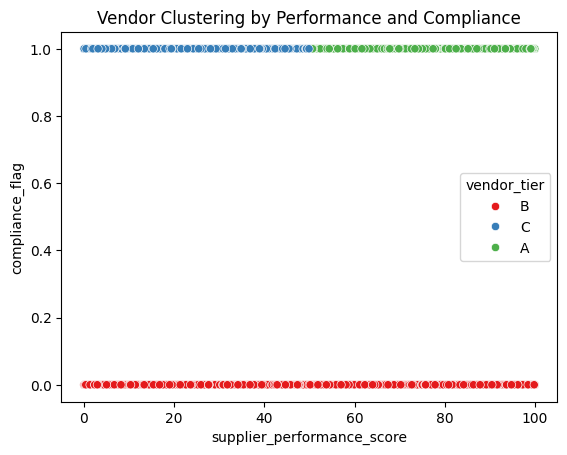

In [335]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    data=data,
    x='supplier_performance_score',
    y='compliance_flag',
    hue='vendor_tier',
    palette='Set1'
)
plt.title("Vendor Clustering by Performance and Compliance")
plt.show()


In [336]:
from sklearn.linear_model import LinearRegression

# Prepare data for regression
X = data[['budget_amount']]
y = data['contract_value']

# Fit linear regression model
reg = LinearRegression()
reg.fit(X, y)

print(f"Intercept: {reg.intercept_:.2f}")
print(f"Coefficient: {reg.coef_[0]:.4f}")

# Example: Predict contract_value for a new budget_amount
example_budget = 50000
predicted_contract = reg.predict([[example_budget]])[0]
print(f"Predicted contract value for budget_amount={example_budget}: {predicted_contract:.2f}")



Intercept: 9.59
Coefficient: 1.0014
Predicted contract value for budget_amount=50000: 50078.47


In [334]:
from sklearn.metrics import r2_score

# Ensure reg is defined and fitted
if 'reg' not in globals():
	from sklearn.linear_model import LinearRegression
	X = data[['budget_amount']]
	y = data['contract_value']
	reg = LinearRegression()
	reg.fit(X, y)
else:
	X = data[['budget_amount']]
	y = data['contract_value']

# Predict contract_value using the fitted model (use the same feature as during fit)
y_pred = reg.predict(X)

# Calculate R² score
r2 = r2_score(y, y_pred)
print(f"Linear Regression R² (contract_value ~ budget_amount): {r2:.2f}")

Linear Regression R² (contract_value ~ budget_amount): 0.89


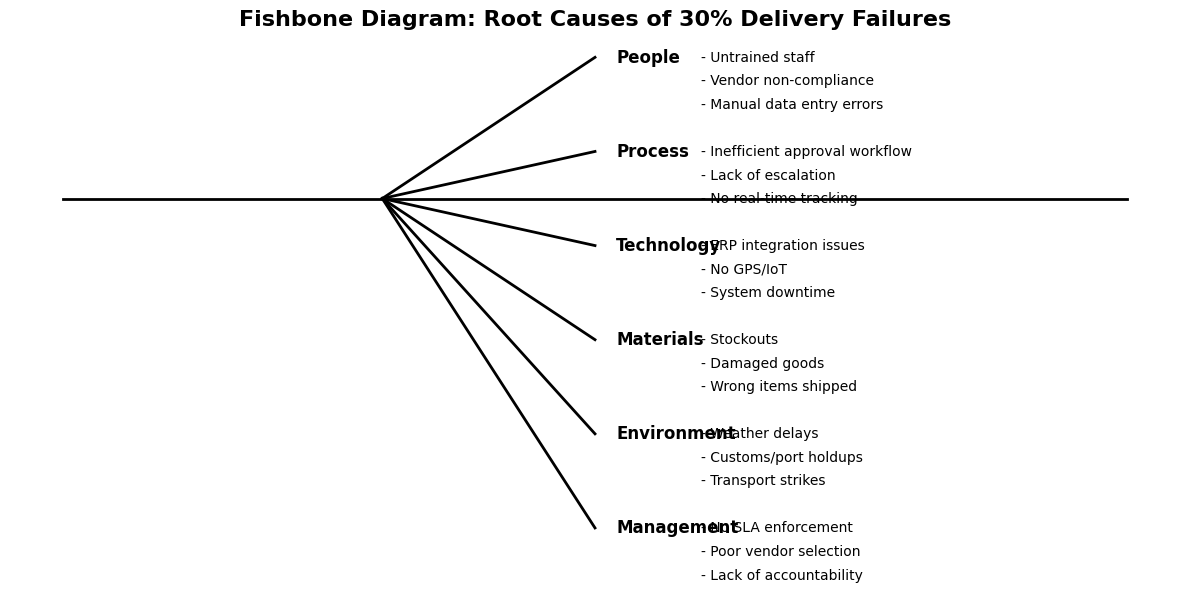

In [337]:
from matplotlib.sankey import Sankey

import matplotlib.pyplot as plt

# Fishbone (Ishikawa) diagram for delivery failures
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')

# Main spine
ax.plot([0, 1], [0.5, 0.5], color='black', lw=2)

# Categories and causes
categories = [
    ("People", ["Untrained staff", "Vendor non-compliance", "Manual data entry errors"]),
    ("Process", ["Inefficient approval workflow", "Lack of escalation", "No real-time tracking"]),
    ("Technology", ["ERP integration issues", "No GPS/IoT", "System downtime"]),
    ("Materials", ["Stockouts", "Damaged goods", "Wrong items shipped"]),
    ("Environment", ["Weather delays", "Customs/port holdups", "Transport strikes"]),
    ("Management", ["No SLA enforcement", "Poor vendor selection", "Lack of accountability"])
]

# Draw bones and annotate
for i, (cat, causes) in enumerate(categories):
    y = 0.8 - i * 0.2
    ax.plot([0.3, 0.5], [0.5, y], color='black', lw=2)
    ax.text(0.52, y, cat, va='center', fontsize=12, fontweight='bold')
    for j, cause in enumerate(causes):
        ax.text(0.6, y - 0.05 * j, f"- {cause}", va='center', fontsize=10)

ax.set_title("Fishbone Diagram: Root Causes of 30% Delivery Failures", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()